<a href="https://colab.research.google.com/github/VarunArora14/ML-minor-project/blob/master/Colab%20Draft_loan_approval_prediction_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing the libraries

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Import all the necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Reading Dataset-1

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
path_curr = "/content/drive/MyDrive/curr.csv"

In [5]:
# Reading data from file
inp0 = pd.read_csv(path_curr)
inp0.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


#### checking size of the data


In [6]:
inp0.shape

(307511, 122)

## Data Cleaning

In [7]:
inp0.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

In [8]:
# Describing the data
inp0.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


#### Insight:
- From the above reading certain details can be identified such as data contains 307511 rows and 122 columns.
- There are certain null values and negative values.
- Data cleaning is needed and standardisation of values also needed.

#### Identify the null values

In [9]:
# find null values
null_values=inp0.isnull().sum()
null_values

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 122, dtype: int64

#### Handling missing values

In [10]:
null_values = round(inp0.isnull().sum()*100/len(inp0),2)

In [11]:
# identify data with more than 50% missing values
null_values_50 = null_values[null_values>50]
null_values_50

OWN_CAR_AGE                 65.99
EXT_SOURCE_1                56.38
APARTMENTS_AVG              50.75
BASEMENTAREA_AVG            58.52
YEARS_BUILD_AVG             66.50
COMMONAREA_AVG              69.87
ELEVATORS_AVG               53.30
ENTRANCES_AVG               50.35
FLOORSMIN_AVG               67.85
LANDAREA_AVG                59.38
LIVINGAPARTMENTS_AVG        68.35
LIVINGAREA_AVG              50.19
NONLIVINGAPARTMENTS_AVG     69.43
NONLIVINGAREA_AVG           55.18
APARTMENTS_MODE             50.75
BASEMENTAREA_MODE           58.52
YEARS_BUILD_MODE            66.50
COMMONAREA_MODE             69.87
ELEVATORS_MODE              53.30
ENTRANCES_MODE              50.35
FLOORSMIN_MODE              67.85
LANDAREA_MODE               59.38
LIVINGAPARTMENTS_MODE       68.35
LIVINGAREA_MODE             50.19
NONLIVINGAPARTMENTS_MODE    69.43
NONLIVINGAREA_MODE          55.18
APARTMENTS_MEDI             50.75
BASEMENTAREA_MEDI           58.52
YEARS_BUILD_MEDI            66.50
COMMONAREA_MED

In [12]:
#Total number of columns with more than 50% missing values
len(null_values_50)

41

In [13]:
# Remove these 41 columns
null_values_50.index

Index(['OWN_CAR_AGE', 'EXT_SOURCE_1', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG',
       'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG',
       'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG',
       'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG',
       'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BUILD_MODE',
       'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMIN_MODE',
       'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE',
       'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI',
       'BASEMENTAREA_MEDI', 'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI',
       'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI',
       'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI',
       'NONLIVINGAREA_MEDI', 'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE',
       'WALLSMATERIAL_MODE'],
      dtype='object')

In [14]:

inp0.drop(columns=null_values_50.index, inplace=True)
inp0.shape

(307511, 81)

In [15]:
null_values = round(inp0.isnull().sum()*100/len(inp0),2)
null_values

SK_ID_CURR                     0.0
TARGET                         0.0
NAME_CONTRACT_TYPE             0.0
CODE_GENDER                    0.0
FLAG_OWN_CAR                   0.0
                              ... 
AMT_REQ_CREDIT_BUREAU_DAY     13.5
AMT_REQ_CREDIT_BUREAU_WEEK    13.5
AMT_REQ_CREDIT_BUREAU_MON     13.5
AMT_REQ_CREDIT_BUREAU_QRT     13.5
AMT_REQ_CREDIT_BUREAU_YEAR    13.5
Length: 81, dtype: float64

In [16]:
#Droping columns comprising more than 20% null values other than Occupation_Type
null_values_20=null_values[null_values>20]
null_values_20

OCCUPATION_TYPE                 31.35
YEARS_BEGINEXPLUATATION_AVG     48.78
FLOORSMAX_AVG                   49.76
YEARS_BEGINEXPLUATATION_MODE    48.78
FLOORSMAX_MODE                  49.76
YEARS_BEGINEXPLUATATION_MEDI    48.78
FLOORSMAX_MEDI                  49.76
TOTALAREA_MODE                  48.27
EMERGENCYSTATE_MODE             47.40
dtype: float64

In [17]:
# Droping occupation type from null value data
null_values_20.drop(["OCCUPATION_TYPE"],inplace = True)
null_values_20

YEARS_BEGINEXPLUATATION_AVG     48.78
FLOORSMAX_AVG                   49.76
YEARS_BEGINEXPLUATATION_MODE    48.78
FLOORSMAX_MODE                  49.76
YEARS_BEGINEXPLUATATION_MEDI    48.78
FLOORSMAX_MEDI                  49.76
TOTALAREA_MODE                  48.27
EMERGENCYSTATE_MODE             47.40
dtype: float64

In [18]:
inp0.drop(columns=null_values_20.index,inplace=True)
inp0.shape

(307511, 73)

In [19]:
inp0.isnull().sum().sum()

412799

In [20]:
null_values = round(inp0.isnull().sum()*100/len(inp0),2)
null_values.head()

SK_ID_CURR            0.0
TARGET                0.0
NAME_CONTRACT_TYPE    0.0
CODE_GENDER           0.0
FLAG_OWN_CAR          0.0
dtype: float64

In [21]:
inp0.shape

(307511, 73)

In [22]:
#Identify unnecessory columns and drom them
inp0.head(10)
unnec_col=["FLAG_DOCUMENT_2","FLAG_DOCUMENT_3","FLAG_DOCUMENT_4","FLAG_DOCUMENT_5","FLAG_DOCUMENT_6","FLAG_DOCUMENT_7","FLAG_DOCUMENT_8","FLAG_DOCUMENT_9","FLAG_DOCUMENT_10","FLAG_DOCUMENT_11","FLAG_DOCUMENT_12","FLAG_DOCUMENT_13","FLAG_DOCUMENT_14","FLAG_DOCUMENT_15","FLAG_DOCUMENT_16","FLAG_DOCUMENT_17","FLAG_DOCUMENT_18","FLAG_DOCUMENT_19","FLAG_DOCUMENT_20","FLAG_DOCUMENT_21"]
inp0.drop(labels=unnec_col, axis=1,inplace=True)
inp0.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,2.0,2.0,2.0,-1134.0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0.0,1.0,0.0,-828.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0.0,0.0,0.0,-815.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0.0,2.0,0.0,-617.0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0.0,0.0,0.0,-1106.0,0.0,0.0,0.0,0.0,0.0,0.0


In [23]:
inp0.shape

(307511, 53)

In [24]:
inp0.isnull().sum().sum()
inp0.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,2.0,2.0,2.0,-1134.0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0.0,1.0,0.0,-828.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0.0,0.0,0.0,-815.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0.0,2.0,0.0,-617.0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0.0,0.0,0.0,-1106.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Inputing values

In [25]:
#Treating columns that are in numeric value
# Treating important columns
inp0.AMT_ANNUITY.isnull().sum()

12

In [26]:
#Replace with mean of particular column
amt_annuity_mean=inp0.AMT_ANNUITY.mean()
amt_annuity_mean

27108.573909183444

In [27]:
inp0.AMT_ANNUITY.fillna(amt_annuity_mean,inplace= True)
inp0.AMT_ANNUITY.value_counts(normalize=True)

9000.0      0.020763
13500.0     0.017931
6750.0      0.007411
10125.0     0.006618
37800.0     0.005210
              ...   
79902.0     0.000003
106969.5    0.000003
60885.0     0.000003
59661.0     0.000003
77809.5     0.000003
Name: AMT_ANNUITY, Length: 13673, dtype: float64

In [28]:
#cross check for null values
inp0.AMT_ANNUITY.isnull().sum()

0

In [29]:
#Occupation Type that is categorical variable 
inp0.OCCUPATION_TYPE.describe()

count       211120
unique          18
top       Laborers
freq         55186
Name: OCCUPATION_TYPE, dtype: object

In [30]:
# Make another column which are having null values in occupation Type.
inp0["OCCUPATION_TYPE"]=inp0["OCCUPATION_TYPE"].fillna("Unidentified")
#cross check for null values in OCCUPATION_TYPE
inp0["OCCUPATION_TYPE"].isnull().sum()

0

In [31]:
#Recheck columns
inp0.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_C

In [32]:
# Add null values for another columns
inp0.isnull().sum()

SK_ID_CURR                         0
TARGET                             0
NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
CNT_CHILDREN                       0
AMT_INCOME_TOTAL                   0
AMT_CREDIT                         0
AMT_ANNUITY                        0
AMT_GOODS_PRICE                  278
NAME_TYPE_SUITE                 1292
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
REGION_POPULATION_RELATIVE         0
DAYS_BIRTH                         0
DAYS_EMPLOYED                      0
DAYS_REGISTRATION                  0
DAYS_ID_PUBLISH                    0
FLAG_MOBIL                         0
FLAG_EMP_PHONE                     0
FLAG_WORK_PHONE                    0
FLAG_CONT_MOBILE                   0
FLAG_PHONE                         0
FLAG_EMAIL                         0
O

In [33]:
# Now first fill null values for EXT_SOURCE_3 
inp0[["EXT_SOURCE_2","EXT_SOURCE_3","AMT_REQ_CREDIT_BUREAU_HOUR","AMT_REQ_CREDIT_BUREAU_DAY","AMT_REQ_CREDIT_BUREAU_WEEK","AMT_REQ_CREDIT_BUREAU_MON","AMT_REQ_CREDIT_BUREAU_QRT","AMT_REQ_CREDIT_BUREAU_YEAR"]].describe()

,EXT_SOURCE_2,EXT_SOURCE_3,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,3.068510e+05,246546.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,5.143927e-01,0.510853,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,1.910602e-01,0.194844,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,8.173617e-08,0.000527,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.924574e-01,0.370650,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5.659614e-01,0.535276,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,6.636171e-01,0.669057,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,8.549997e-01,0.896010,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [34]:
# To make it easy create variable ext3_amt_credit
ext_amt_credit=["EXT_SOURCE_2","EXT_SOURCE_3","AMT_REQ_CREDIT_BUREAU_HOUR","AMT_REQ_CREDIT_BUREAU_DAY","AMT_REQ_CREDIT_BUREAU_WEEK","AMT_REQ_CREDIT_BUREAU_MON","AMT_REQ_CREDIT_BUREAU_QRT","AMT_REQ_CREDIT_BUREAU_YEAR"]

In [35]:
# fill null values by median values
inp0.fillna(inp0[ext_amt_credit].median(),inplace=True)            
inp0.isnull().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
FLAG_OWN_REALTY                   0
CNT_CHILDREN                      0
AMT_INCOME_TOTAL                  0
AMT_CREDIT                        0
AMT_ANNUITY                       0
AMT_GOODS_PRICE                 278
NAME_TYPE_SUITE                1292
NAME_INCOME_TYPE                  0
NAME_EDUCATION_TYPE               0
NAME_FAMILY_STATUS                0
NAME_HOUSING_TYPE                 0
REGION_POPULATION_RELATIVE        0
DAYS_BIRTH                        0
DAYS_EMPLOYED                     0
DAYS_REGISTRATION                 0
DAYS_ID_PUBLISH                   0
FLAG_MOBIL                        0
FLAG_EMP_PHONE                    0
FLAG_WORK_PHONE                   0
FLAG_CONT_MOBILE                  0
FLAG_PHONE                        0
FLAG_EMAIL                        0
OCCUPATION_TYPE             

In [36]:
inp0.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,2.0,2.0,2.0,-1134.0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0.0,1.0,0.0,-828.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0.0,0.0,0.0,-815.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0.0,2.0,0.0,-617.0,0.0,0.0,0.0,0.0,0.0,1.0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0.0,0.0,0.0,-1106.0,0.0,0.0,0.0,0.0,0.0,0.0


In [37]:
#Treatment of Name type suite
inp0.NAME_TYPE_SUITE.describe()

count            306219
unique                7
top       Unaccompanied
freq             248526
Name: NAME_TYPE_SUITE, dtype: object

In [38]:
#Unique value is 7 and top value is unaccompanied so replace null values with it
inp0["NAME_TYPE_SUITE"]=inp0["NAME_TYPE_SUITE"].fillna("Unaccompanied")
#cross check for null values in OCCUPATION_TYPE
inp0["NAME_TYPE_SUITE"].isnull().sum()

0

In [39]:
#Treatment of Obs and def columns
inp0[["OBS_30_CNT_SOCIAL_CIRCLE","DEF_30_CNT_SOCIAL_CIRCLE","OBS_60_CNT_SOCIAL_CIRCLE","DEF_60_CNT_SOCIAL_CIRCLE"]].describe()

,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE
count,306490.000000,306490.000000,306490.000000,306490.000000
mean,1.422245,0.143421,1.405292,0.100049
std,2.400989,0.446698,2.379803,0.362291
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000
75%,2.000000,0.000000,2.000000,0.000000
max,348.000000,34.000000,344.000000,24.000000


In [40]:
#create variable
obs_def=["OBS_30_CNT_SOCIAL_CIRCLE","DEF_30_CNT_SOCIAL_CIRCLE","OBS_60_CNT_SOCIAL_CIRCLE","DEF_60_CNT_SOCIAL_CIRCLE"]

In [41]:
#replace with mean
inp0.fillna(inp0[obs_def].median(),inplace=True)            
inp0.isnull().sum()

SK_ID_CURR                       0
TARGET                           0
NAME_CONTRACT_TYPE               0
CODE_GENDER                      0
FLAG_OWN_CAR                     0
FLAG_OWN_REALTY                  0
CNT_CHILDREN                     0
AMT_INCOME_TOTAL                 0
AMT_CREDIT                       0
AMT_ANNUITY                      0
AMT_GOODS_PRICE                278
NAME_TYPE_SUITE                  0
NAME_INCOME_TYPE                 0
NAME_EDUCATION_TYPE              0
NAME_FAMILY_STATUS               0
NAME_HOUSING_TYPE                0
REGION_POPULATION_RELATIVE       0
DAYS_BIRTH                       0
DAYS_EMPLOYED                    0
DAYS_REGISTRATION                0
DAYS_ID_PUBLISH                  0
FLAG_MOBIL                       0
FLAG_EMP_PHONE                   0
FLAG_WORK_PHONE                  0
FLAG_CONT_MOBILE                 0
FLAG_PHONE                       0
FLAG_EMAIL                       0
OCCUPATION_TYPE                  0
CNT_FAM_MEMBERS     

In [42]:
#check remaining columns to check standardisation 
column_days = ["DAYS_BIRTH","DAYS_EMPLOYED","DAYS_REGISTRATION","DAYS_ID_PUBLISH","DAYS_LAST_PHONE_CHANGE"]
inp0[column_days].describe()

,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,DAYS_LAST_PHONE_CHANGE
count,307511.000000,307511.000000,307511.000000,307511.000000,307510.000000
mean,-16036.995067,63815.045904,-4986.120328,-2994.202373,-962.858788
std,4363.988632,141275.766519,3522.886321,1509.450419,826.808487
min,-25229.000000,-17912.000000,-24672.000000,-7197.000000,-4292.000000
25%,-19682.000000,-2760.000000,-7479.500000,-4299.000000,-1570.000000
50%,-15750.000000,-1213.000000,-4504.000000,-3254.000000,-757.000000
75%,-12413.000000,-289.000000,-2010.000000,-1720.000000,-274.000000
max,-7489.000000,365243.000000,0.000000,0.000000,0.000000


In [43]:
#correcting negative values
inp0[column_days]=abs(inp0[column_days])
inp0[column_days].describe()


,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,DAYS_LAST_PHONE_CHANGE
count,307511.000000,307511.000000,307511.000000,307511.000000,307510.000000
mean,16036.995067,67724.742149,4986.120328,2994.202373,962.858788
std,4363.988632,139443.751806,3522.886321,1509.450419,826.808487
min,7489.000000,0.000000,0.000000,0.000000,0.000000
25%,12413.000000,933.000000,2010.000000,1720.000000,274.000000
50%,15750.000000,2219.000000,4504.000000,3254.000000,757.000000
75%,19682.000000,5707.000000,7479.500000,4299.000000,1570.000000
max,25229.000000,365243.000000,24672.000000,7197.000000,4292.000000


In [44]:
# Convert columns-DAYS_BIRTH ad DAYS_EMPLOYED to YEARS
inp0["AGE"]= inp0["DAYS_BIRTH"]/365
bins=[0,20,30,40,50,60,100]
bin_category=["0-20","20-30","30-40","40-50","50-60","60 Above"]
inp0["AGE_RANGE"]=pd.cut(inp0["AGE"],bins=bins,labels=bin_category)

In [45]:
inp0["AGE_RANGE"].value_counts(normalize=True)*100

30-40       26.765872
40-50       24.890492
50-60       22.133192
20-30       14.640452
60 Above    11.569993
0-20         0.000000
Name: AGE_RANGE, dtype: float64

In [46]:
inp0["DAYS_EMPLOYED"].describe()

count    307511.000000
mean      67724.742149
std      139443.751806
min           0.000000
25%         933.000000
50%        2219.000000
75%        5707.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

In [47]:
inp0["EMPLOYMENT_YEARS"]= inp0["DAYS_EMPLOYED"]/365
bins=[0,5,10,15,20,25,30,35,40,45,50]
bin_category=["0-5","5-10","10-15","15-20","20-25","25-30","30-35","35-40","40-45","45 Above"]
inp0["EMPLOYMENT_YEARS_RANGE"]=pd.cut(inp0["EMPLOYMENT_YEARS"],bins=bins,labels=bin_category)

In [48]:
inp0["EMPLOYMENT_YEARS"].describe()

count    307511.000000
mean        185.547239
std         382.037676
min           0.000000
25%           2.556164
50%           6.079452
75%          15.635616
max        1000.665753
Name: EMPLOYMENT_YEARS, dtype: float64

In [49]:
inp0["EMPLOYMENT_YEARS_RANGE"].value_counts(normalize=True)*100

0-5         54.061911
5-10        25.729074
10-15       10.926289
15-20        4.302854
20-25        2.476054
25-30        1.311996
30-35        0.769032
35-40        0.329982
40-45        0.083289
45 Above     0.009519
Name: EMPLOYMENT_YEARS_RANGE, dtype: float64

### Outlier handling

In [50]:
inp0.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE,EMPLOYMENT_YEARS
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307511.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,16036.995067,67724.742149,...,0.099717,962.858788,0.005538,0.006055,0.029723,0.231293,0.229631,1.778463,43.936973,185.547239
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.454517,3.694465e+05,0.013831,4363.988632,139443.751806,...,0.361735,826.808487,0.078014,0.103037,0.190728,0.856810,0.744059,1.765523,11.956133,382.037676
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,7489.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.517808,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,12413.000000,933.000000,...,0.000000,274.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,34.008219,2.556164
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,15750.000000,2219.000000,...,0.000000,757.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,43.150685,6.079452
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,19682.000000,5707.000000,...,0.000000,1570.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,53.923288,15.635616
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,25229.000000,365243.000000,...,24.000000,4292.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000,69.120548,1000.665753


#### With the help of description we can identify columns that contain outliers as it will provide a difference between max and different percentile.

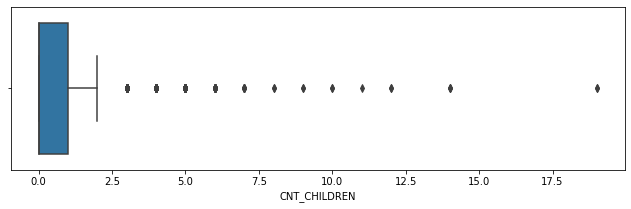

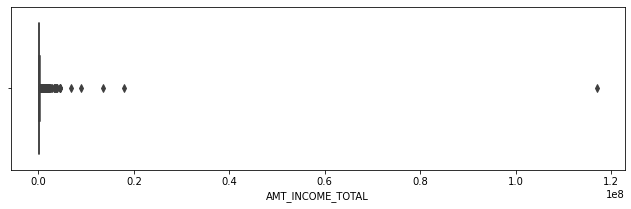

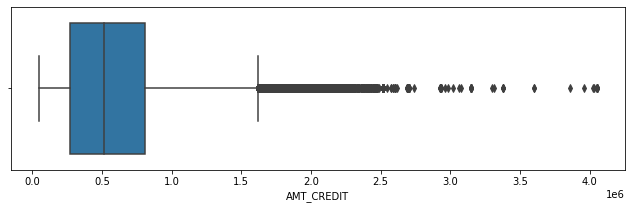

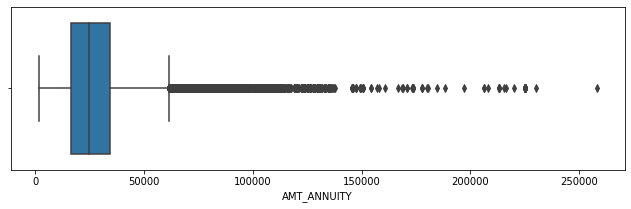

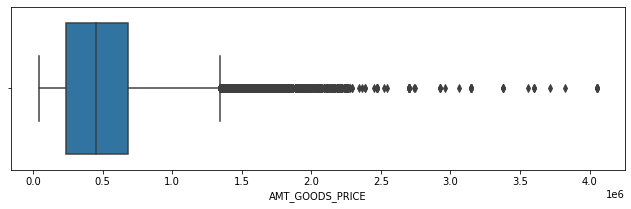

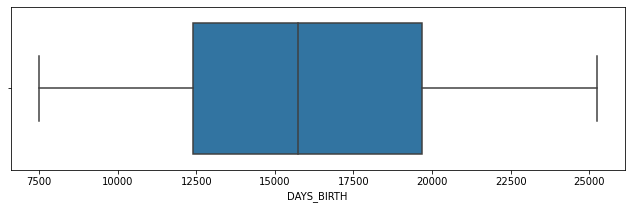

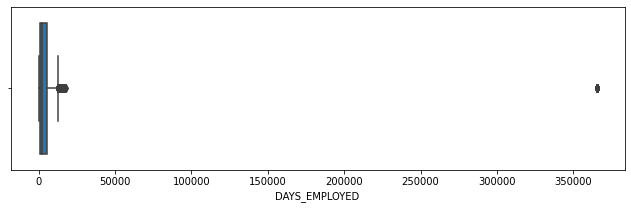

In [51]:
#important columns with outliers(variables)
plt.figure(figsize=(11,3))
sns.boxplot(inp0.CNT_CHILDREN)
plt.show()

plt.figure(figsize=(11,3))
sns.boxplot(inp0.AMT_INCOME_TOTAL)
plt.show()

plt.figure(figsize=(11,3))
sns.boxplot(inp0.AMT_CREDIT)
plt.show()

plt.figure(figsize=(11,3))
sns.boxplot(inp0.AMT_ANNUITY)
plt.show()

plt.figure(figsize=(11,3))
sns.boxplot(inp0.AMT_GOODS_PRICE)
plt.show()

plt.figure(figsize=(11,3))
sns.boxplot(inp0.DAYS_BIRTH)
plt.show()

plt.figure(figsize=(11,3))
sns.boxplot(inp0.DAYS_EMPLOYED)
plt.show()



#### Insight:
 
 From application data we can say that
 - There are certain outliers available in CNT_CHILDREN,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE.
 - DAYS_BIRTH column is reliable because there are no outliers in it.
 - AMT_INCOME_TOTAL has many outliers; it means there is a very big difference of income amongst the loan applicants.
 - DAYS_EMPLOYED shows incorrect entry as days employed can not be 350000.

In [52]:
#Handle outliers by using bin
inp0.AMT_INCOME_TOTAL.describe()

count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

In [53]:
#create bins for AMT_INCOME_TOTAL

bins=[0,150000,300000,450000,600000,750000]
binned_category=["Very Low","Low","Medium","High","Very High"]
inp0["AMT_INCOME_RANGE"]=pd.cut(inp0["AMT_INCOME_TOTAL"],bins=bins,labels=binned_category)


In [54]:
inp0.AMT_CREDIT.describe()

count    3.075110e+05
mean     5.990260e+05
std      4.024908e+05
min      4.500000e+04
25%      2.700000e+05
50%      5.135310e+05
75%      8.086500e+05
max      4.050000e+06
Name: AMT_CREDIT, dtype: float64

In [55]:
#create bins for AMT_CREDIT
bins=[0,200000,400000,600000,800000,1000000]
binned_category=["Very Low","Low","Medium","High","Very High"]
inp0["AMT_CREDIT_RANGE"]=pd.cut(inp0["AMT_CREDIT"],bins=bins,labels=binned_category)
inp0

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE,AGE_RANGE,EMPLOYMENT_YEARS,EMPLOYMENT_YEARS_RANGE,AMT_INCOME_RANGE,AMT_CREDIT_RANGE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0.0,0.0,0.0,1.0,25.920548,20-30,1.745205,0-5,Low,Medium
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0.0,0.0,0.0,0.0,45.931507,40-50,3.254795,0-5,Low,NaN
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0.0,0.0,0.0,0.0,52.180822,50-60,0.616438,0-5,Very Low,Very Low
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0.0,0.0,0.0,1.0,52.068493,50-60,8.326027,5-10,Very Low,Low
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0.0,0.0,0.0,0.0,54.608219,50-60,8.323288,5-10,Very Low,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0.0,0.0,0.0,1.0,25.553425,20-30,0.646575,0-5,Low,Low
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0.0,0.0,0.0,1.0,56.917808,50-60,1000.665753,NaN,Very Low,Low
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0.0,1.0,0.0,1.0,41.002740,40-50,21.701370,20-25,Low,High
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0.0,0.0,0.0,0.0,32.769863,30-40,13.112329,10-15,Low,Low


In [56]:
#identify unique entries
inp0.nunique().sort_values(ascending=False)

SK_ID_CURR                     307511
EXT_SOURCE_2                   119831
DAYS_BIRTH                      17460
AGE                             17460
DAYS_REGISTRATION               15688
AMT_ANNUITY                     13673
EMPLOYMENT_YEARS                12574
DAYS_EMPLOYED                   12574
DAYS_ID_PUBLISH                  6168
AMT_CREDIT                       5603
DAYS_LAST_PHONE_CHANGE           3773
AMT_INCOME_TOTAL                 2548
AMT_GOODS_PRICE                  1002
EXT_SOURCE_3                      814
REGION_POPULATION_RELATIVE         81
ORGANIZATION_TYPE                  58
OBS_30_CNT_SOCIAL_CIRCLE           33
OBS_60_CNT_SOCIAL_CIRCLE           33
AMT_REQ_CREDIT_BUREAU_YEAR         25
HOUR_APPR_PROCESS_START            24
AMT_REQ_CREDIT_BUREAU_MON          24
OCCUPATION_TYPE                    19
CNT_FAM_MEMBERS                    17
CNT_CHILDREN                       15
AMT_REQ_CREDIT_BUREAU_QRT          11
DEF_30_CNT_SOCIAL_CIRCLE           10
EMPLOYMENT_Y

In [57]:
inp0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 59 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   SK_ID_CURR                   307511 non-null  int64   
 1   TARGET                       307511 non-null  int64   
 2   NAME_CONTRACT_TYPE           307511 non-null  object  
 3   CODE_GENDER                  307511 non-null  object  
 4   FLAG_OWN_CAR                 307511 non-null  object  
 5   FLAG_OWN_REALTY              307511 non-null  object  
 6   CNT_CHILDREN                 307511 non-null  int64   
 7   AMT_INCOME_TOTAL             307511 non-null  float64 
 8   AMT_CREDIT                   307511 non-null  float64 
 9   AMT_ANNUITY                  307511 non-null  float64 
 10  AMT_GOODS_PRICE              307233 non-null  float64 
 11  NAME_TYPE_SUITE              307511 non-null  object  
 12  NAME_INCOME_TYPE             307511 non-null

In [58]:
#Convert important columns to cateorial column
inp0.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_C

In [59]:
converted_columns = ["NAME_CONTRACT_TYPE","CODE_GENDER","FLAG_OWN_REALTY","NAME_TYPE_SUITE","NAME_INCOME_TYPE","NAME_EDUCATION_TYPE",
                       "NAME_FAMILY_STATUS","NAME_HOUSING_TYPE","OCCUPATION_TYPE","WEEKDAY_APPR_PROCESS_START",
                       "ORGANIZATION_TYPE","REG_REGION_NOT_WORK_REGION","LIVE_REGION_NOT_WORK_REGION"]

for column in converted_columns:
    inp0[column] = pd.Categorical(inp0[column])


In [60]:
inp0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 59 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   SK_ID_CURR                   307511 non-null  int64   
 1   TARGET                       307511 non-null  int64   
 2   NAME_CONTRACT_TYPE           307511 non-null  category
 3   CODE_GENDER                  307511 non-null  category
 4   FLAG_OWN_CAR                 307511 non-null  object  
 5   FLAG_OWN_REALTY              307511 non-null  category
 6   CNT_CHILDREN                 307511 non-null  int64   
 7   AMT_INCOME_TOTAL             307511 non-null  float64 
 8   AMT_CREDIT                   307511 non-null  float64 
 9   AMT_ANNUITY                  307511 non-null  float64 
 10  AMT_GOODS_PRICE              307233 non-null  float64 
 11  NAME_TYPE_SUITE              307511 non-null  category
 12  NAME_INCOME_TYPE             307511 non-null

In [61]:
inp0.shape

(307511, 59)

#### ANALYSIS

##### Checking imbalance percentage


In [62]:
inp0["TARGET"].value_counts(normalize=True)*100

0    91.927118
1     8.072882
Name: TARGET, dtype: float64

- There is data imbalance in TARGET
Repayer percentage is 91.93(Approx).
Defaulter percentage is 8.07(Approx).

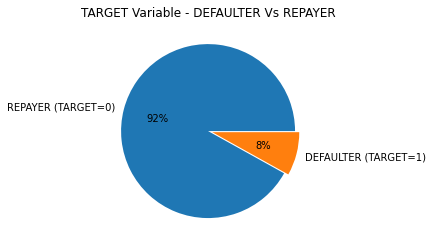

In [63]:
plt.pie(inp0["TARGET"].value_counts(normalize=True)*100,labels=["REPAYER (TARGET=0)","DEFAULTER (TARGET=1)"],explode=(0,0.05),autopct="%1.f%%")
plt.title("TARGET Variable - DEFAULTER Vs REPAYER")
plt.show()                                                                

#### Univariate analysis- categorical feautures


In [64]:
# Divinding TARGET variable into two parts target_1 is REPAYER and target_2 is DEFAULTER

target_0 = inp0[inp0["TARGET"]==0]
target_1 = inp0[inp0["TARGET"]==1]

In [65]:
target_0.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE,AGE_RANGE,EMPLOYMENT_YEARS,EMPLOYMENT_YEARS_RANGE,AMT_INCOME_RANGE,AMT_CREDIT_RANGE
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0.0,0.0,0.0,0.0,45.931507,40-50,3.254795,0-5,Low,NaN
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0.0,0.0,0.0,0.0,52.180822,50-60,0.616438,0-5,Very Low,Very Low
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0.0,0.0,0.0,1.0,52.068493,50-60,8.326027,5-10,Very Low,Low
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0.0,0.0,0.0,0.0,54.608219,50-60,8.323288,5-10,Very Low,Medium
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,...,0.0,0.0,1.0,1.0,46.413699,40-50,4.350685,0-5,Very Low,Medium


In [66]:
target_1.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE,AGE_RANGE,EMPLOYMENT_YEARS,EMPLOYMENT_YEARS_RANGE,AMT_INCOME_RANGE,AMT_CREDIT_RANGE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0.0,0.0,0.0,1.0,25.920548,20-30,1.745205,0-5,Low,Medium
26,100031,1,Cash loans,F,N,Y,0,112500.0,979992.0,27076.5,...,0.0,0.0,2.0,2.0,51.298630,50-60,7.200000,5-10,Very Low,Very High
40,100047,1,Cash loans,M,N,Y,0,202500.0,1193580.0,35028.0,...,0.0,2.0,0.0,4.0,47.895890,40-50,3.457534,0-5,Low,NaN
42,100049,1,Cash loans,F,N,N,0,135000.0,288873.0,16258.5,...,0.0,0.0,0.0,2.0,36.668493,30-40,9.854795,5-10,Very Low,Low
81,100096,1,Cash loans,F,N,Y,0,81000.0,252000.0,14593.5,...,0.0,0.0,0.0,0.0,67.928767,60 Above,1000.665753,NaN,Very Low,Low


#### Univariate Analysis for REPAYER and DEFAULTER for numeric variables

In [67]:
inp0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 59 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   SK_ID_CURR                   307511 non-null  int64   
 1   TARGET                       307511 non-null  int64   
 2   NAME_CONTRACT_TYPE           307511 non-null  category
 3   CODE_GENDER                  307511 non-null  category
 4   FLAG_OWN_CAR                 307511 non-null  object  
 5   FLAG_OWN_REALTY              307511 non-null  category
 6   CNT_CHILDREN                 307511 non-null  int64   
 7   AMT_INCOME_TOTAL             307511 non-null  float64 
 8   AMT_CREDIT                   307511 non-null  float64 
 9   AMT_ANNUITY                  307511 non-null  float64 
 10  AMT_GOODS_PRICE              307233 non-null  float64 
 11  NAME_TYPE_SUITE              307511 non-null  category
 12  NAME_INCOME_TYPE             307511 non-null

#### Age

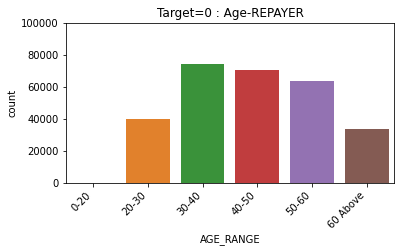

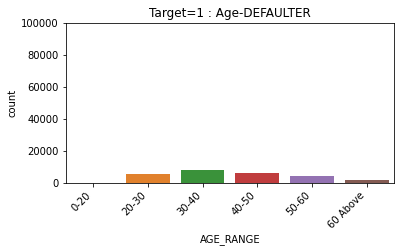

In [68]:
#Creating plots for Age_range for REPAYER
plt.figure(figsize = (20,10))
plt.subplot(3, 3, 2)
plt.ylim(0,100000)
plt.title("Target=0 : Age-REPAYER")
plt.xticks(rotation=45, ha='right')
sns.countplot(x=target_0["AGE_RANGE"])
plt.show()


#Creating plots for Age_range for DEFAULTER
plt.figure(figsize = (20,10))
plt.subplot(3, 3, 2)
plt.ylim(0,100000)
plt.title("Target=1 : Age-DEFAULTER")
plt.xticks(rotation=45, ha='right')
sns.countplot(x=target_1["AGE_RANGE"])
plt.show()


######  Insights:
- Age range between 30 to 40 can be able to pay their loan on time also, by considering other factors age range 40-50 can be considered to provide a loan.
- Also, with the same Age range these applicants are riskiest people to lend a loan.With increasing age defaulters are decreases.

#### Employment years range

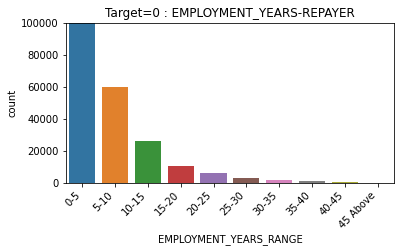

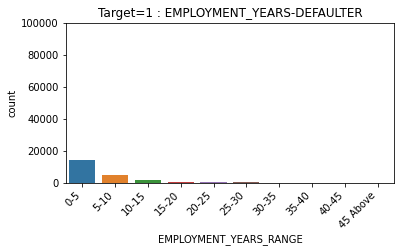

In [69]:
#Creating plots for Employment_years_range for REPAYER
plt.figure(figsize = (20,10))
plt.subplot(3, 3, 2)
plt.ylim(0,100000)
plt.title("Target=0 : EMPLOYMENT_YEARS-REPAYER")
plt.xticks(rotation=45, ha='right')
sns.countplot(x=target_0["EMPLOYMENT_YEARS_RANGE"])
plt.show()


#Creating plots for Employment_years_range for DEFAULTER
plt.figure(figsize = (20,10))
plt.subplot(3, 3, 2)
plt.ylim(0,100000)
plt.title("Target=1 : EMPLOYMENT_YEARS-DEFAULTER")
plt.xticks(rotation=45, ha='right')
sns.countplot(x=target_1["EMPLOYMENT_YEARS_RANGE"])
plt.show()


##### Insights:
- Applicants between 0-5 years Employment years are highest repayers.
- It is similar in Defaultees also. approx 10% applicants are defaultees from 0-5 years employment range which is gradually decreasing with increasing years.

#### Amt credit range

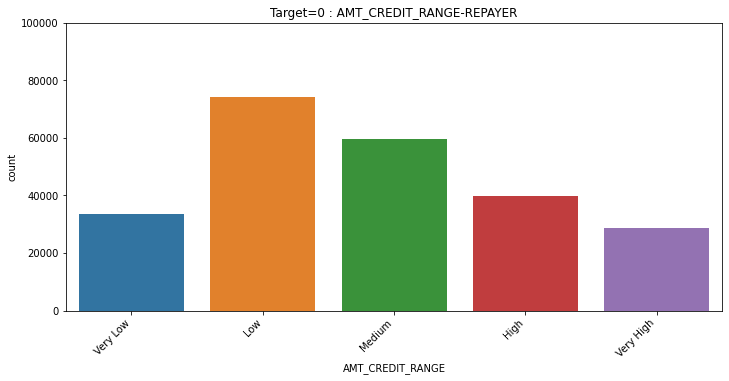

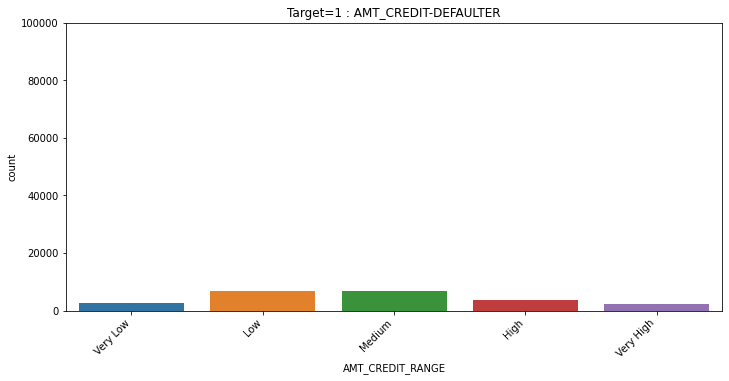

In [70]:
#Creating plots for Amt_credit_range for REPAYER
plt.figure(figsize = (40,18))
plt.subplot(3, 3, 2)
plt.ylim(0,100000)
plt.title("Target=0 : AMT_CREDIT_RANGE-REPAYER")
plt.xticks(rotation=45, ha='right')
sns.countplot(x=target_0["AMT_CREDIT_RANGE"])
plt.show()


#Creating plots for Amt_credit_range for DEFAULTER
plt.figure(figsize = (40,18))
plt.subplot(3, 3, 2)
plt.ylim(0,100000)
plt.title("Target=1 : AMT_CREDIT-DEFAULTER")
plt.xticks(rotation=45, ha='right')
sns.countplot(x=target_1["AMT_CREDIT_RANGE"])
plt.show()


##### Insights:
- From the observation Low is most repaid range of credit.
- Medium credit range is including highest defaulters.



#### Categorical Variables

#### Name contract type

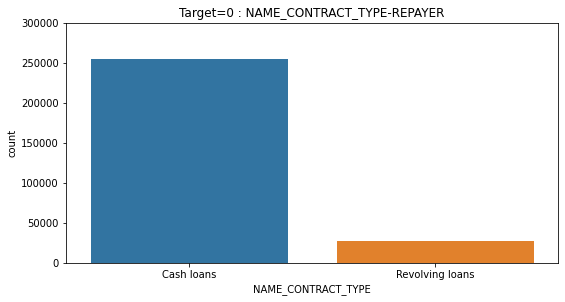

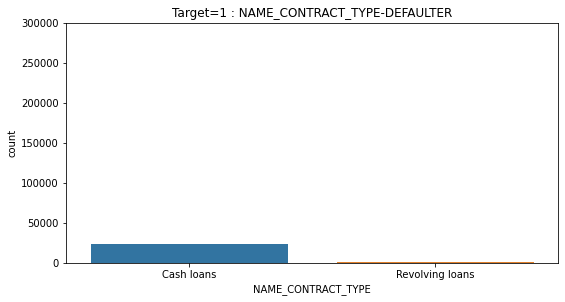

In [71]:
#Creating plots for REPAYER
plt.figure(figsize = (30,15))
plt.subplot(3, 3, 2)
plt.ylim(0,300000)
plt.title("Target=0 : NAME_CONTRACT_TYPE-REPAYER")
sns.countplot(x=target_0["NAME_CONTRACT_TYPE"])
plt.show()


#Creating plots for DEFAULTER
plt.figure(figsize = (30,15))
plt.subplot(3, 3, 2)
plt.ylim(0,300000)
plt.title("Target=1 : NAME_CONTRACT_TYPE-DEFAULTER")
sns.countplot(x=target_1["NAME_CONTRACT_TYPE"])
plt.show()


#### Insights:
- Revolving loans are very small part of total loans.
- Very few loan applicants are defaulter in revolving loans.



#### Code Gender

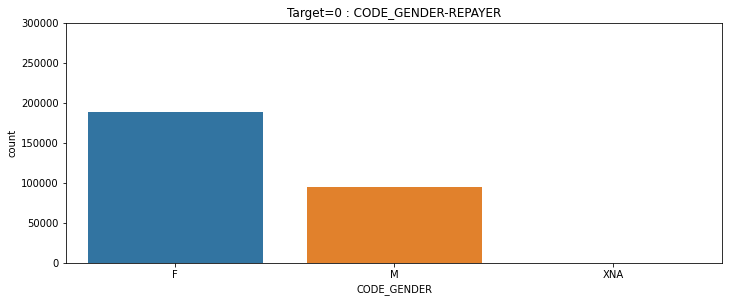

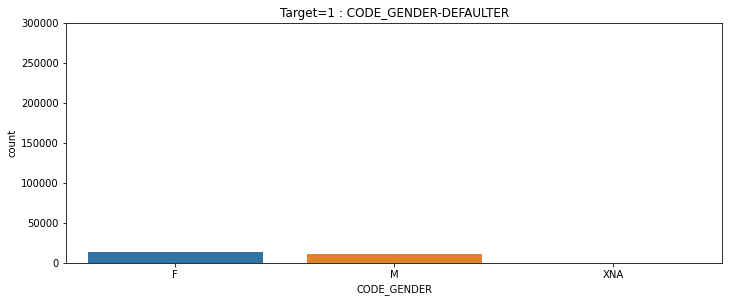

In [72]:
#Creating plots for REPAYER
plt.figure(figsize = (40,15))
plt.subplot(3, 3, 2)
plt.ylim(0,300000)
plt.title("Target=0 : CODE_GENDER-REPAYER")
sns.countplot(x=target_0["CODE_GENDER"])
plt.show()


#Creating plots for DEFAULTER
plt.figure(figsize = (40,15))
plt.subplot(3, 3, 2)
plt.ylim(0,300000)
plt.title("Target=1 : CODE_GENDER-DEFAULTER")
sns.countplot(x=target_1["CODE_GENDER"])
plt.show()


###### Insights:
- Males clients have a highest chances to being a defaulter.
- Female clients are highest repayers of loans.

#### Flag own realty

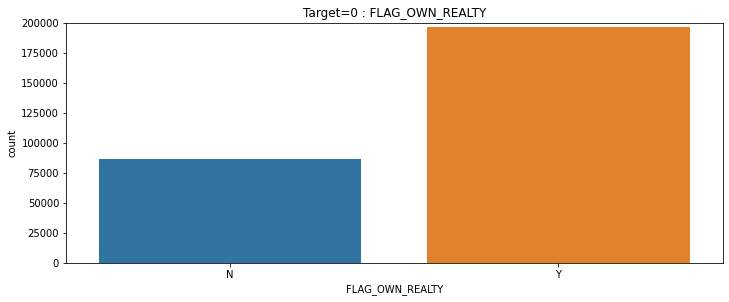

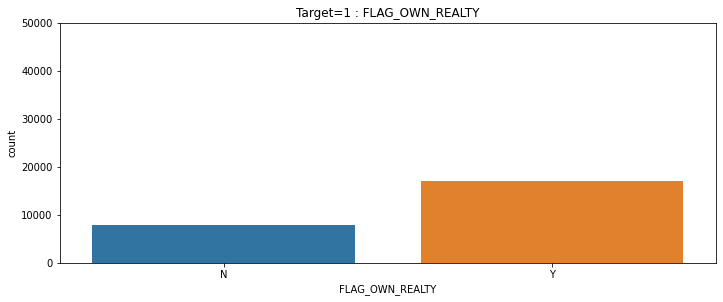

In [73]:
#Creating plots for REPAYER
plt.figure(figsize = (40,15))
plt.subplot(3, 3, 2)
plt.ylim(0,200000)
plt.title("Target=0 : FLAG_OWN_REALTY")
sns.countplot(x=target_0["FLAG_OWN_REALTY"])
plt.show()


#Creating plots for DEFAULTER
plt.figure(figsize = (40,15))
plt.subplot(3, 3, 2)
plt.ylim(0,50000)
plt.title("Target=1 : FLAG_OWN_REALTY")
sns.countplot(x=target_1["FLAG_OWN_REALTY"])
plt.show()

###### Insights:
- The number of clients are almost double who are into real estate.
- The defaulter's rate is also higher from the same group.


#### Name Income Type

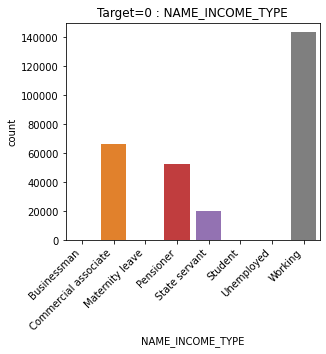

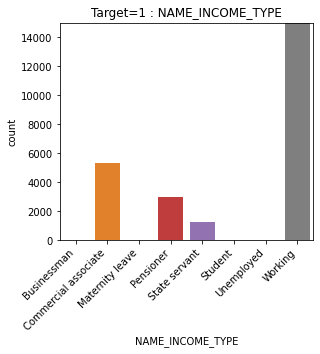

In [74]:
#Creating plots for REPAYER
plt.figure(figsize = (10,4))
plt.subplot(1, 2, 1)
plt.ylim(0,150000)
plt.title("Target=0 : NAME_INCOME_TYPE")
plt.xticks(rotation=45, ha='right')
sns.countplot(x=target_0["NAME_INCOME_TYPE"])
plt.show()


#Creating plots for DEFAULTER
plt.figure(figsize = (10,4))
plt.subplot(1,2,2)
plt.ylim(0,15000)
plt.title("Target=1 : NAME_INCOME_TYPE")
plt.xticks(rotation=45, ha='right')
sns.countplot(x=target_1["NAME_INCOME_TYPE"])
plt.show()

###### Insights:
- Students,Unemployed are not defaulter.It may be possible that students do not need to pay when they are students and unemploed 's loan can not be granted.
- Commercial associates are highest repayer and DEFAULTER as well.

#### Name Family Status

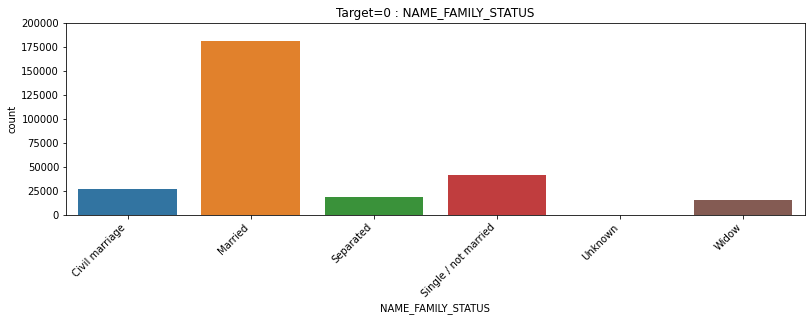

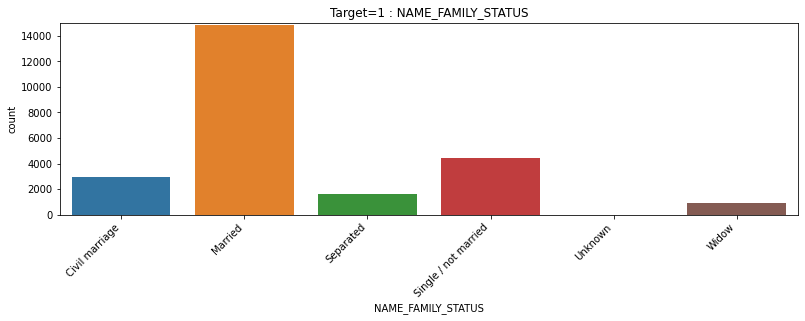

In [75]:
#Creating plots for REPAYER
plt.figure(figsize = (45,12))
plt.subplot(3, 3, 2)
plt.ylim(0,200000)
plt.title("Target=0 : NAME_FAMILY_STATUS")
plt.xticks(rotation=45, ha='right')
sns.countplot(x=target_0["NAME_FAMILY_STATUS"])
plt.show()


#Creating plots for DEFAULTER
plt.figure(figsize = (45,12))
plt.subplot(3, 3, 2)
plt.ylim(0,15000)
plt.title("Target=1 : NAME_FAMILY_STATUS")
plt.xticks(rotation=45, ha='right')
sns.countplot(x=target_1["NAME_FAMILY_STATUS"])
plt.show()

###### Insights:
- Married people are applying for loans as compare to others.
- There is more risk to lend them loan too as they are more likely to be defaulter.

#### Name Housing Type

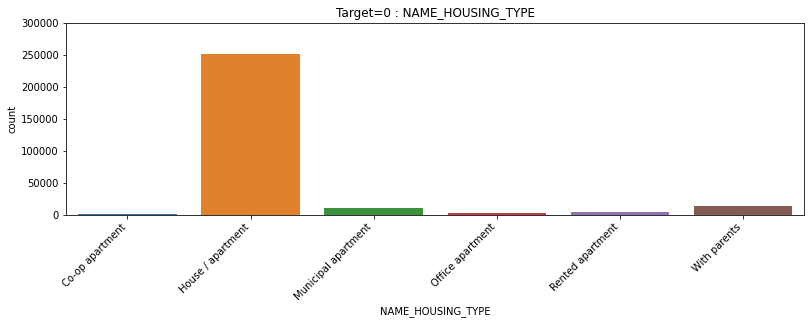

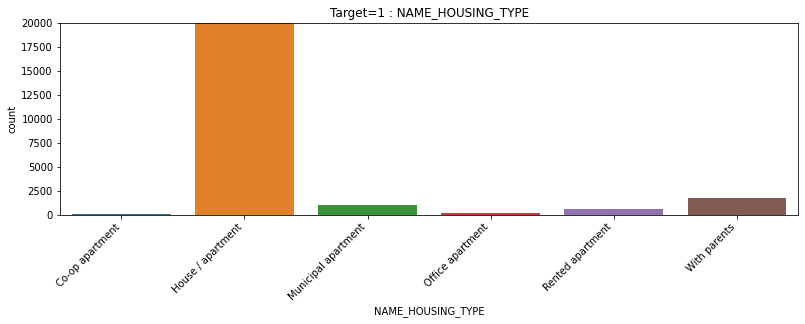

In [76]:
#Creating plots for REPAYER
plt.figure(figsize = (45,12))
plt.subplot(3, 3, 2)
plt.ylim(0,300000)
plt.title("Target=0 : NAME_HOUSING_TYPE")
plt.xticks(rotation=45, ha='right')
sns.countplot(x=target_0["NAME_HOUSING_TYPE"])
plt.show()


#Creating plots for DEFAULTER
plt.figure(figsize = (45,12))
plt.subplot(3, 3, 2)
plt.ylim(0,20000)
plt.title("Target=1 : NAME_HOUSING_TYPE")
plt.xticks(rotation=45, ha='right')
sns.countplot(x=target_1["NAME_HOUSING_TYPE"])
plt.show()

###### Insights:
- Most of the people applied for the loan are living in the House/appartment.
- Very less number of loan applicants are living in co-op -apartment or office appartment.
- Office apparment 's loan applicants have lowest default rate.

#### Occupation Type

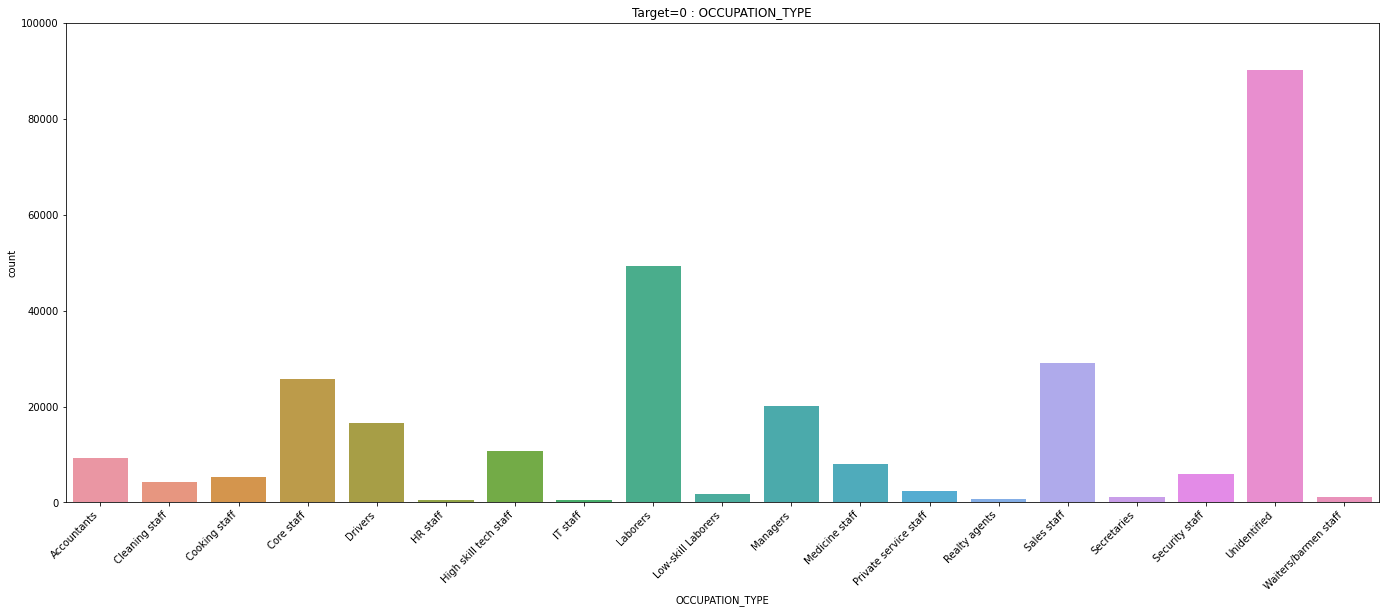

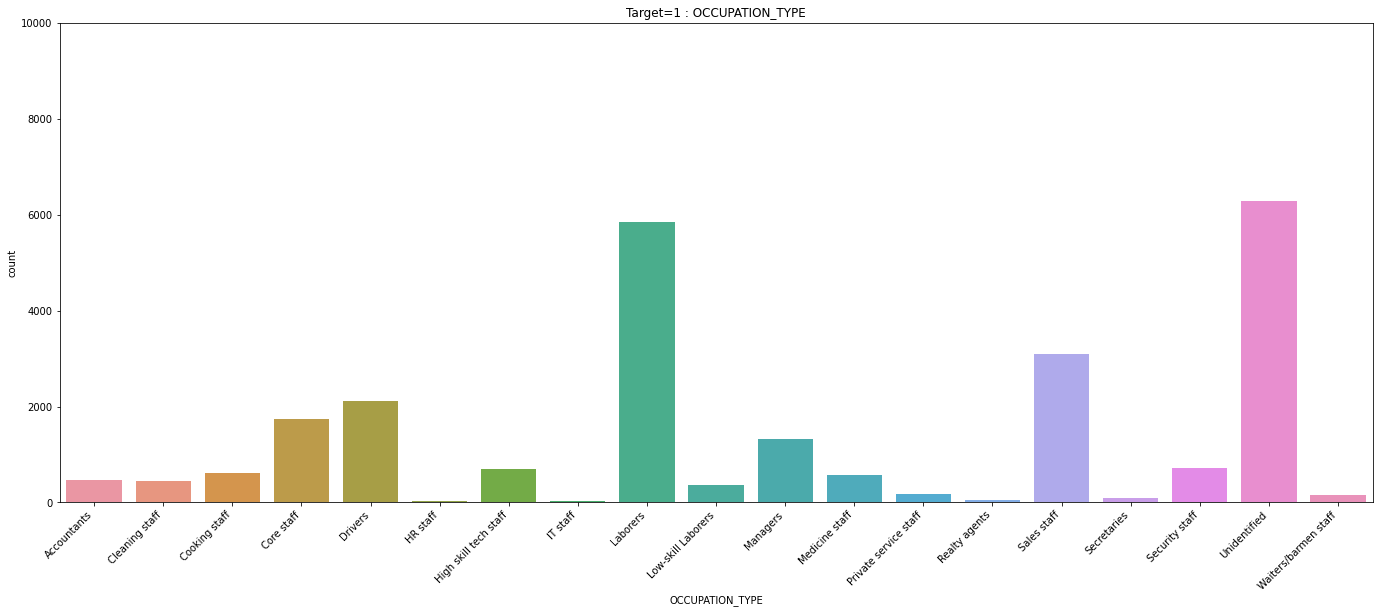

In [77]:
#Creating plots for REPAYER
plt.figure(figsize = (80,30))
plt.subplot(3, 3, 2)
plt.ylim(0,100000)
plt.title("Target=0 : OCCUPATION_TYPE")
plt.xticks(rotation=45, ha='right')
sns.countplot(x=target_0["OCCUPATION_TYPE"])
plt.show()


#Creating plots for DEFAULTER
plt.figure(figsize = (80,30))
plt.subplot(3, 3, 2)
plt.ylim(0,10000)
plt.title("Target=1 : OCCUPATION_TYPE")
plt.xticks(rotation=45, ha='right')
sns.countplot(x=target_1["OCCUPATION_TYPE"])
plt.show()

###### Insights:
- Labourers and Sales staff are highest applicants of loan and defaultees too.
- IT staff, HR Staff are less in numbers of applicants of loan.


### Categorical Bivariate or Multivariate Analysis

In [78]:
inp0.groupby("NAME_INCOME_TYPE")["AMT_INCOME_TOTAL"].describe()


,count,mean,std,min,25%,50%,75%,max
NAME_INCOME_TYPE,,,,,,,,
Businessman,10.0,652500.000000,627226.035812,180000.0,225000.0,495000.0,843750.0,2250000.0
Commercial associate,71617.0,202955.327289,147974.151536,26550.0,135000.0,180000.0,225000.0,18000090.0
Maternity leave,5.0,140400.000000,126856.907577,49500.0,67500.0,90000.0,135000.0,360000.0
Pensioner,55362.0,136401.292273,76650.331247,25650.0,90000.0,117000.0,166500.0,2250000.0
State servant,21703.0,179737.969506,100880.579748,27000.0,112500.0,157500.0,225000.0,3150000.0
Student,18.0,170500.000000,106644.682171,81000.0,112500.0,157500.0,178875.0,562500.0
Unemployed,22.0,110536.363636,88055.079059,26550.0,54000.0,78750.0,135000.0,337500.0
Working,158774.0,163169.889223,307577.685943,25650.0,112500.0,135000.0,202500.0,117000000.0


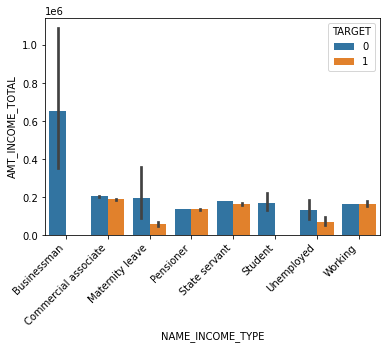

In [79]:
sns.barplot(x="NAME_INCOME_TYPE",y="AMT_INCOME_TOTAL",hue="TARGET",data=inp0) 
plt.xticks(rotation=45, ha='right')
plt.show()


###### Insights:
- Businessman 's income range is highest and that is why Repayer rate is higher in them.
- Commercial associate, state servant, working  's defaulter rate is higher in the given data.


#### checking correlation

In [80]:
inp0.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_C

In [81]:
cols_correlation1 = ["NAME_CONTRACT_TYPE", "CODE_GENDER", "FLAG_OWN_CAR","FLAG_OWN_REALTY", 
                        "CNT_CHILDREN", "AMT_INCOME_TOTAL", "AMT_CREDIT", "AMT_ANNUITY", "AMT_GOODS_PRICE", 
                        "NAME_TYPE_SUITE", "NAME_INCOME_TYPE", "NAME_EDUCATION_TYPE", "NAME_FAMILY_STATUS",
                        "NAME_HOUSING_TYPE", "REGION_POPULATION_RELATIVE", "DAYS_BIRTH", "DAYS_EMPLOYED", 
                        "DAYS_REGISTRATION", "DAYS_ID_PUBLISH", "OCCUPATION_TYPE", "CNT_FAM_MEMBERS", "REGION_RATING_CLIENT",
                        "REGION_RATING_CLIENT_W_CITY", "WEEKDAY_APPR_PROCESS_START", "HOUR_APPR_PROCESS_START",
                        "REG_REGION_NOT_LIVE_REGION", "REG_REGION_NOT_WORK_REGION", "LIVE_REGION_NOT_WORK_REGION", 
                        "REG_CITY_NOT_LIVE_CITY", "REG_CITY_NOT_WORK_CITY", "LIVE_CITY_NOT_WORK_CITY", "ORGANIZATION_TYPE", "OBS_30_CNT_SOCIAL_CIRCLE", "DEF_30_CNT_SOCIAL_CIRCLE",
                        "OBS_60_CNT_SOCIAL_CIRCLE", "DEF_60_CNT_SOCIAL_CIRCLE", "DAYS_LAST_PHONE_CHANGE","AMT_REQ_CREDIT_BUREAU_HOUR", "AMT_REQ_CREDIT_BUREAU_DAY", "AMT_REQ_CREDIT_BUREAU_WEEK","AMT_REQ_CREDIT_BUREAU_MON",
                        "AMT_REQ_CREDIT_BUREAU_QRT", "AMT_REQ_CREDIT_BUREAU_YEAR"]

target_0_col=inp0.loc[inp0['TARGET']==0, cols_correlation1]
target_1_col=inp0.loc[inp0['TARGET']==1, cols_correlation1]


In [82]:
len(cols_correlation1)

43

In [83]:
target_0.head(10)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE,AGE_RANGE,EMPLOYMENT_YEARS,EMPLOYMENT_YEARS_RANGE,AMT_INCOME_RANGE,AMT_CREDIT_RANGE
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0.0,0.0,0.0,0.0,45.931507,40-50,3.254795,0-5,Low,NaN
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0.0,0.0,0.0,0.0,52.180822,50-60,0.616438,0-5,Very Low,Very Low
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0.0,0.0,0.0,1.0,52.068493,50-60,8.326027,5-10,Very Low,Low
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0.0,0.0,0.0,0.0,54.608219,50-60,8.323288,5-10,Very Low,Medium
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,...,0.0,0.0,1.0,1.0,46.413699,40-50,4.350685,0-5,Very Low,Medium
6,100009,0,Cash loans,F,Y,Y,1,171000.0,1560726.0,41301.0,...,0.0,1.0,1.0,2.0,37.747945,30-40,8.575342,5-10,Low,NaN
7,100010,0,Cash loans,M,Y,Y,0,360000.0,1530000.0,42075.0,...,0.0,0.0,0.0,0.0,51.643836,50-60,1.230137,0-5,Medium,NaN
8,100011,0,Cash loans,F,N,Y,0,112500.0,1019610.0,33826.5,...,0.0,0.0,0.0,1.0,55.065753,50-60,1000.665753,NaN,Very Low,NaN
9,100012,0,Revolving loans,M,N,Y,0,135000.0,405000.0,20250.0,...,0.0,0.0,0.0,1.0,39.641096,30-40,5.531507,5-10,Very Low,Medium
10,100014,0,Cash loans,F,N,Y,1,112500.0,652500.0,21177.0,...,0.0,1.0,0.0,0.0,27.936986,20-30,1.860274,0-5,Very Low,High


In [84]:
#checking correlation amongst the variable for target_0
corr0=target_0_col.corr()
corr0=corr0.where(np.triu(np.ones(corr0.shape), k=1).astype(np.bool))
corr0

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,...,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
CNT_CHILDREN,NaN,0.027397,0.003081,0.020905,-0.000525,-0.024363,-0.336966,-0.245174,-0.185792,0.028751,...,-0.002193,0.014199,-0.002125,0.008501,0.000147,0.001057,-0.000315,-0.007640,-0.004218,-0.035861
AMT_INCOME_TOTAL,NaN,NaN,0.342799,0.418949,0.349462,0.167851,-0.062609,-0.140392,-0.064937,-0.022896,...,-0.027998,-0.028507,-0.027897,0.041338,0.002707,0.008029,0.008647,0.058682,0.017676,0.034384
AMT_CREDIT,NaN,NaN,NaN,0.771297,0.987250,0.100604,0.047378,-0.070104,-0.013477,0.001464,...,-0.019433,-0.000180,-0.021859,0.069540,-0.002267,0.005135,0.000941,0.055063,0.021825,-0.037519
AMT_ANNUITY,NaN,NaN,NaN,NaN,0.776674,0.120983,-0.012262,-0.104978,-0.039434,-0.014113,...,-0.022162,-0.012280,-0.023053,0.062012,0.003220,0.002464,0.012384,0.036293,0.011660,-0.008009
AMT_GOODS_PRICE,NaN,NaN,NaN,NaN,NaN,0.103827,0.044565,-0.068609,-0.015916,0.003649,...,-0.020746,-0.000277,-0.022923,0.071373,-0.001703,0.005507,0.001176,0.056649,0.022122,-0.039815
REGION_POPULATION_RELATIVE,NaN,NaN,NaN,NaN,NaN,NaN,0.025244,-0.007198,0.052083,0.001071,...,0.005409,-0.012493,0.001808,0.041164,-0.002334,0.001629,-0.002814,0.071495,-0.001954,0.000152
DAYS_BIRTH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.626114,0.333151,0.271314,...,0.003141,-0.007132,0.001065,0.076510,-0.002926,-0.001587,0.003570,0.001871,0.015427,0.073352
DAYS_EMPLOYED,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.214511,0.276663,...,0.019395,0.007531,0.016398,-0.023379,-0.004292,-0.000932,0.001741,-0.032821,0.013322,0.046890
DAYS_REGISTRATION,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.100236,...,-0.001209,-0.008224,-0.002645,0.053533,0.002514,0.000009,0.001268,0.010877,0.000363,0.024278
DAYS_ID_PUBLISH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.000335,0.012902,-0.002429,0.082949,-0.001943,0.002199,0.006943,0.017382,0.017089,0.047551


In [85]:
#checking correlation of top 10
corr0_inp0 = corr0.unstack().reset_index()
corr0_inp0.columns=["VAR1","VAR2","Correlation"]
corr0_inp0.dropna(subset = ["Correlation"], inplace = True)
corr0_inp0["Correlation"] = round(corr0_inp0["Correlation"], 2)
corr0_inp0["Correlation"] = corr0_inp0["Correlation"].abs()
corr0_inp0.sort_values(by = "Correlation", ascending = False).head(10)


,VAR1,VAR2,Correlation
598,OBS_60_CNT_SOCIAL_CIRCLE,OBS_30_CNT_SOCIAL_CIRCLE,1.00
118,AMT_GOODS_PRICE,AMT_CREDIT,0.99
359,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,0.95
290,CNT_FAM_MEMBERS,CNT_CHILDREN,0.88
628,DEF_60_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,0.86
509,LIVE_CITY_NOT_WORK_CITY,REG_CITY_NOT_WORK_CITY,0.83
119,AMT_GOODS_PRICE,AMT_ANNUITY,0.78
89,AMT_ANNUITY,AMT_CREDIT,0.77
209,DAYS_EMPLOYED,DAYS_BIRTH,0.63
324,REGION_RATING_CLIENT,REGION_POPULATION_RELATIVE,0.54


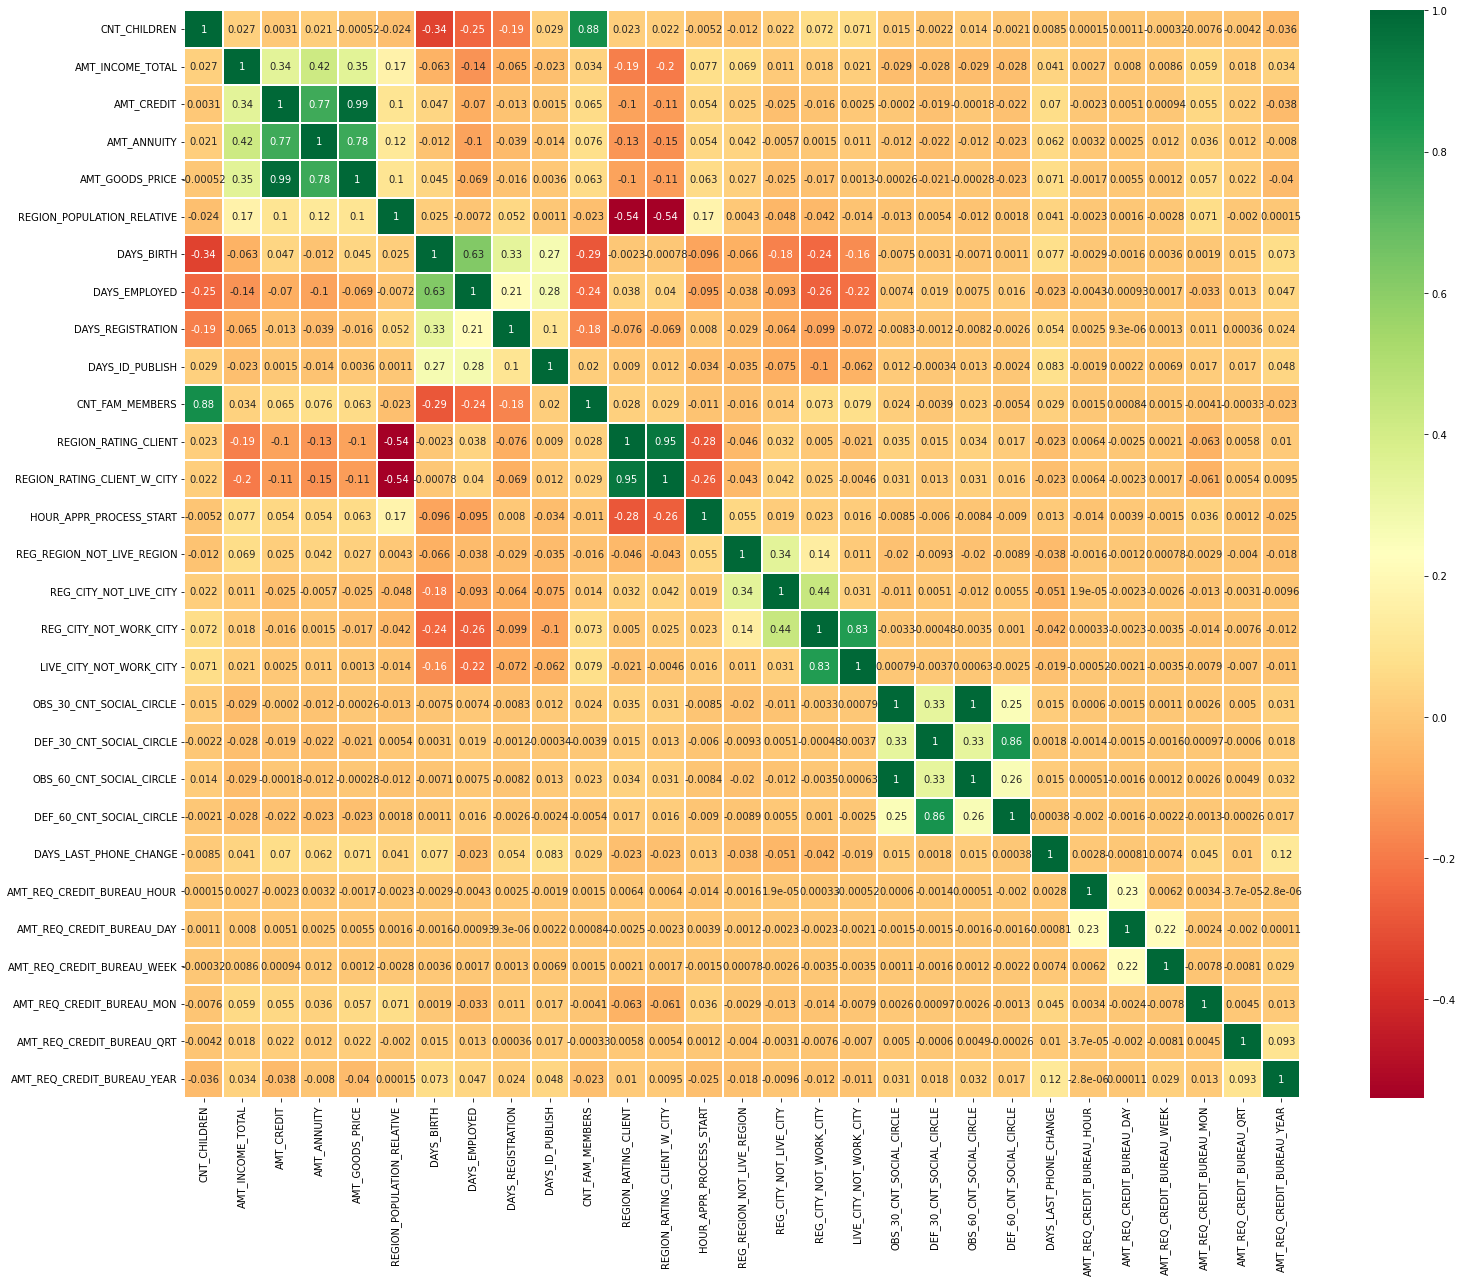

In [86]:
# Plotting heatmao to visualise correlation among repyers
fig = plt.figure(figsize=(25,20))
ax = sns.heatmap(target_0_col.corr(), cmap="RdYlGn",annot=True,linewidth =1)

#### Insights:
- There is very high relationship between credit amount,goods price amount,amt annuity and total income.
- There is also high relationship between Days birth and days employed.
- CNT Children and family members also shares high relationship.

In [87]:
#checking correlation amongst the variable for target_0
corr1=target_1_col.corr()
corr1=corr1.where(np.triu(np.ones(corr1.shape), k=1).astype(np.bool))
corr1

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,...,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
CNT_CHILDREN,NaN,0.004796,-0.001675,0.031257,-0.008112,-0.031975,-0.259109,-0.192864,-0.149154,0.032299,...,0.001520,0.025285,-0.005039,-0.011547,0.000316,-0.011255,-0.009316,-0.008852,-0.013029,-0.027253
AMT_INCOME_TOTAL,NaN,NaN,0.038131,0.046421,0.037583,0.009135,-0.003096,-0.014977,-0.000158,0.004215,...,-0.005170,-0.004588,-0.004852,0.002429,0.001079,0.000135,0.000941,0.005718,0.001037,0.004516
AMT_CREDIT,NaN,NaN,NaN,0.752195,0.983103,0.069161,0.135316,0.001930,0.025854,0.052329,...,-0.025503,0.020242,-0.030461,0.110851,-0.003771,0.004346,0.010598,0.056227,-0.007201,-0.020698
AMT_ANNUITY,NaN,NaN,NaN,NaN,0.752699,0.071690,0.014303,-0.081207,-0.034279,0.016767,...,-0.021794,0.006465,-0.026966,0.079870,0.012968,0.000074,0.028784,0.049000,-0.007261,-0.009819
AMT_GOODS_PRICE,NaN,NaN,NaN,NaN,NaN,0.076049,0.135810,0.006642,0.025679,0.056086,...,-0.021380,0.021028,-0.025826,0.118303,-0.002459,0.005450,0.010777,0.059103,-0.006120,-0.022840
REGION_POPULATION_RELATIVE,NaN,NaN,NaN,NaN,NaN,NaN,0.048190,0.015532,0.056222,0.015537,...,0.025824,0.006741,0.018199,0.055139,-0.000710,-0.004546,0.003485,0.065248,-0.004433,0.003198
DAYS_BIRTH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.582185,0.289114,0.252863,...,-0.004939,0.005388,-0.003994,0.111199,-0.011650,0.007956,0.008244,0.010923,0.022904,0.083838
DAYS_EMPLOYED,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.192455,0.229090,...,0.003066,-0.008498,0.005280,0.001402,-0.007307,0.019381,0.013237,-0.023088,0.012230,0.030812
DAYS_REGISTRATION,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.096833,...,-0.010332,-0.014577,-0.009185,0.071727,0.004798,0.007868,-0.002278,-0.003401,0.012512,0.013572
DAYS_ID_PUBLISH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.007448,0.019823,-0.004813,0.123951,-0.000481,0.014249,0.003732,0.024159,0.007979,0.056391


In [88]:
#checking correlation of top 10
corr1_inp0 = corr1.unstack().reset_index()
corr1_inp0.columns=["VAR1","VAR2","Correlation"]
corr1_inp0.dropna(subset = ["Correlation"], inplace = True)
corr1_inp0["Correlation"] = round(corr1_inp0["Correlation"], 2)
corr1_inp0["Correlation"] = corr1_inp0["Correlation"].abs()
corr1_inp0.sort_values(by = "Correlation", ascending = False).head(10)

,VAR1,VAR2,Correlation
598,OBS_60_CNT_SOCIAL_CIRCLE,OBS_30_CNT_SOCIAL_CIRCLE,1.00
118,AMT_GOODS_PRICE,AMT_CREDIT,0.98
359,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,0.96
290,CNT_FAM_MEMBERS,CNT_CHILDREN,0.89
628,DEF_60_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,0.87
509,LIVE_CITY_NOT_WORK_CITY,REG_CITY_NOT_WORK_CITY,0.78
89,AMT_ANNUITY,AMT_CREDIT,0.75
119,AMT_GOODS_PRICE,AMT_ANNUITY,0.75
209,DAYS_EMPLOYED,DAYS_BIRTH,0.58
479,REG_CITY_NOT_WORK_CITY,REG_CITY_NOT_LIVE_CITY,0.47


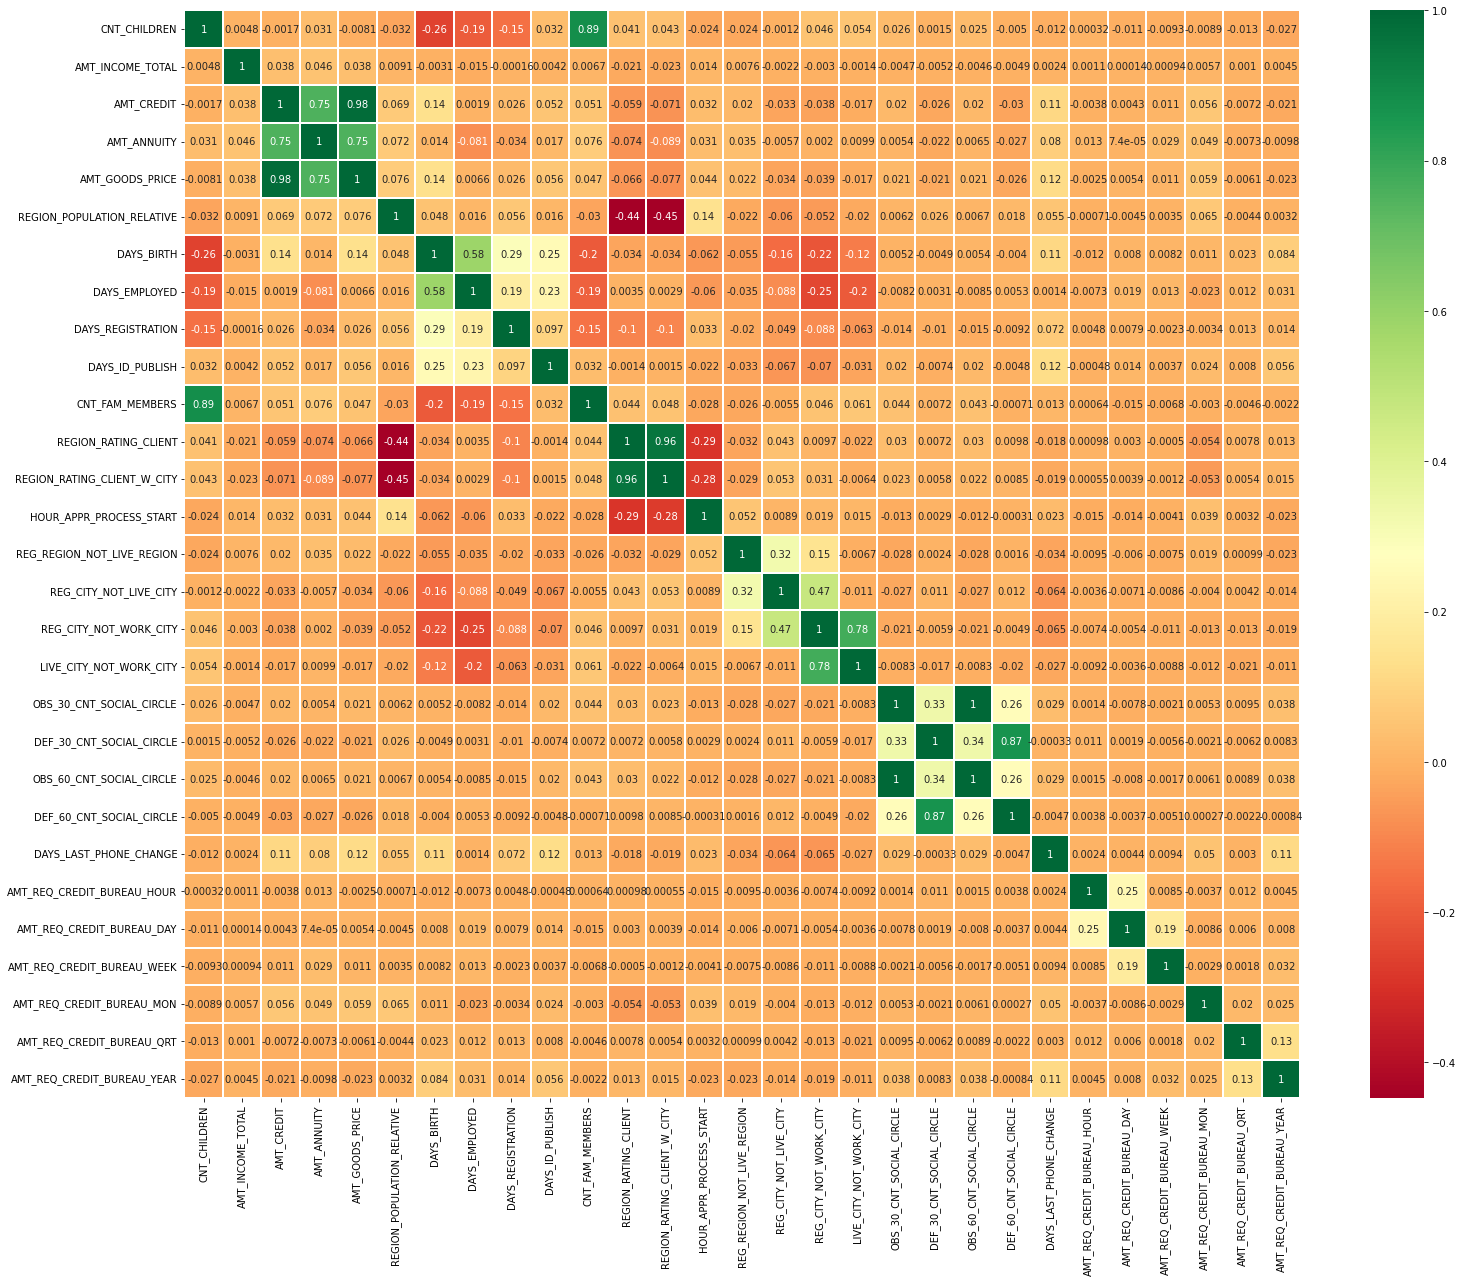

In [89]:
# Plotting heatmao to visualise correlation among repyers
fig = plt.figure(figsize=(25,20))
ax = sns.heatmap(target_1_col.corr(), cmap="RdYlGn",annot=True,linewidth =1)

###### Insights:
- Amount credit is highly correlated with goods price,and amount annuity.
- Days of birth and days of employed are also correlated with each other.
- There are few changes in relationship among variables as compared to repayer.

(0.0, 4250074.05)

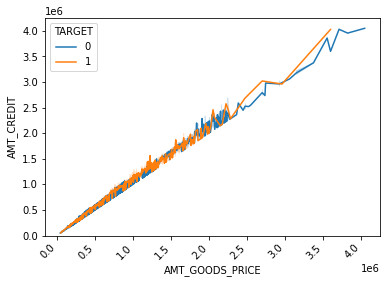

In [90]:
# Numerical Bivariate analysis
sns.lineplot(x="AMT_GOODS_PRICE",y="AMT_CREDIT",hue="TARGET",data=inp0)
plt.xticks(rotation=45, ha='right')
plt.ylim(0,)

###### Insights:
- As credit amount increases more than 25 lakhs defalter rate also increase.It shows that amount of loan affects the repayment of loan.

In [91]:
#pair plot among variables for analysis
# AMT_1 = inp0[[ "AMT_INCOME_TOTAL","AMT_CREDIT","AMT_ANNUITY", "AMT_GOODS_PRICE","TARGET"]]
# AMT_1 = AMT_1[(AMT_1["AMT_GOODS_PRICE"].notnull()) & (AMT_1["AMT_ANNUITY"].notnull())]

# ax= sns.pairplot(AMT_1,hue="TARGET")
# ax.fig.legend(labels=["Defaulter","Repayer"])
# plt.show()

###### Insights:
- Amount credit and goods price are highly correlated as scatter chart form a line.
- Very few defaulter are available when amount credit is more than 15 Lakhs.


## Conclusions:



1.An applicant may be Repayer can be analysed with following insights.

- Age between 30-40 are highest repayer of loan.
- Employment years between 0-5 are highest repayer.
- Low credit range between 40,000 to 80,000 are highest repayer.
- Cash loans are very huge part of total loans.
- Female clients are highest repayer almost double than male clients.
- Labourers and Sales staff are highest applicants of loan and defaultees too.

2.Applicant may be Repayer can be analysed with following insights.

- With increasing age and employment years defaluter are decreases.
- Medium credit range is including highest defaulters 
- Very few clients are defalutees in revolving loans.
- Males cliens have highest chances to being a defaulter.

3.Bank can follow reject or can approve loan with higher intersts by considering following conclusion.

- Commercial associate, state servant, working 's defaulter rate is higher in the given data.
- Married people are applying for loans more as compare to others.
- Males clients have a highest chances to being a defaulter.
- People having more than 3 children are consisting high default rate.
- People who lived in a rented house are higher as compare to people lived in their own houses -so chances of defaultees are higher.



In [92]:
inp0["TARGET"].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

In [93]:
inp0.to_csv("og.csv")

#### Exported og.csv for manual feature selection based on correlation

## Feature Selection (Mutual Classification)

In [94]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.model_selection import train_test_split

In [95]:
inp0.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE,AGE_RANGE,EMPLOYMENT_YEARS,EMPLOYMENT_YEARS_RANGE,AMT_INCOME_RANGE,AMT_CREDIT_RANGE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0.0,0.0,0.0,1.0,25.920548,20-30,1.745205,0-5,Low,Medium
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0.0,0.0,0.0,0.0,45.931507,40-50,3.254795,0-5,Low,NaN
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0.0,0.0,0.0,0.0,52.180822,50-60,0.616438,0-5,Very Low,Very Low
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0.0,0.0,0.0,1.0,52.068493,50-60,8.326027,5-10,Very Low,Low
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0.0,0.0,0.0,0.0,54.608219,50-60,8.323288,5-10,Very Low,Medium


### Identifying Object Data Types

In [96]:
cat_col = [col for col in inp0.columns if inp0[col].dtype == 'object'] # categorical columns

In [97]:
cat_col

['FLAG_OWN_CAR']

In [98]:
cat_col = pd.get_dummies(inp0[cat_col], drop_first=True) # one hot encoding

In [99]:
cat_col

,FLAG_OWN_CAR_Y
0,0
1,0
2,1
3,0
4,0
...,...
307506,0
307507,0
307508,0
307509,0


In [100]:
X = inp0.iloc[:,0:-1]
y = inp0.iloc[:,0:-1]

In [101]:
mic = SelectKBest(mutual_info_classif, k=10)

In [102]:
X.shape

(307511, 58)

In [103]:
X.drop(['EMPLOYMENT_YEARS_RANGE'], axis=1, inplace=True)
X = X[X['AMT_INCOME_RANGE'].notna()]
X = X[X['DAYS_LAST_PHONE_CHANGE'].notna()]
X = X[X['AMT_GOODS_PRICE'].notna()]
X.isnull().sum()
y=X


#### Training and Testing the data

In [104]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X.drop(labels=["TARGET"], axis=1), X["TARGET"], test_size=0.3, random_state=0)

In [105]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 306589 entries, 0 to 307510
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   SK_ID_CURR                   306589 non-null  int64   
 1   TARGET                       306589 non-null  int64   
 2   NAME_CONTRACT_TYPE           306589 non-null  category
 3   CODE_GENDER                  306589 non-null  category
 4   FLAG_OWN_CAR                 306589 non-null  object  
 5   FLAG_OWN_REALTY              306589 non-null  category
 6   CNT_CHILDREN                 306589 non-null  int64   
 7   AMT_INCOME_TOTAL             306589 non-null  float64 
 8   AMT_CREDIT                   306589 non-null  float64 
 9   AMT_ANNUITY                  306589 non-null  float64 
 10  AMT_GOODS_PRICE              306589 non-null  float64 
 11  NAME_TYPE_SUITE              306589 non-null  category
 12  NAME_INCOME_TYPE             306589 non-null

In [106]:
X['FLAG_OWN_CAR'].replace({'N': 0, 'Y': 1}, inplace=True) # change object to numeric

In [107]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 306589 entries, 0 to 307510
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   SK_ID_CURR                   306589 non-null  int64   
 1   TARGET                       306589 non-null  int64   
 2   NAME_CONTRACT_TYPE           306589 non-null  category
 3   CODE_GENDER                  306589 non-null  category
 4   FLAG_OWN_CAR                 306589 non-null  int64   
 5   FLAG_OWN_REALTY              306589 non-null  category
 6   CNT_CHILDREN                 306589 non-null  int64   
 7   AMT_INCOME_TOTAL             306589 non-null  float64 
 8   AMT_CREDIT                   306589 non-null  float64 
 9   AMT_ANNUITY                  306589 non-null  float64 
 10  AMT_GOODS_PRICE              306589 non-null  float64 
 11  NAME_TYPE_SUITE              306589 non-null  category
 12  NAME_INCOME_TYPE             306589 non-null

In [108]:
X = X.select_dtypes(exclude=["category"]) # select only numeric columns

In [109]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 306589 entries, 0 to 307510
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   306589 non-null  int64  
 1   TARGET                       306589 non-null  int64  
 2   FLAG_OWN_CAR                 306589 non-null  int64  
 3   CNT_CHILDREN                 306589 non-null  int64  
 4   AMT_INCOME_TOTAL             306589 non-null  float64
 5   AMT_CREDIT                   306589 non-null  float64
 6   AMT_ANNUITY                  306589 non-null  float64
 7   AMT_GOODS_PRICE              306589 non-null  float64
 8   REGION_POPULATION_RELATIVE   306589 non-null  float64
 9   DAYS_BIRTH                   306589 non-null  int64  
 10  DAYS_EMPLOYED                306589 non-null  int64  
 11  DAYS_REGISTRATION            306589 non-null  float64
 12  DAYS_ID_PUBLISH              306589 non-null  int64  
 13 

## Mutual Classification for repayers

In [110]:
temp_target_0 = X[X["TARGET"]==0]
temp_target_1 = X[X["TARGET"]==1]

In [111]:
temp_0 = temp_target_0.drop(labels=["TARGET"], axis=1)

In [112]:
y_0 = temp_target_0["TARGET"]

In [113]:
mutual_info_0 = mutual_info_classif(temp_0, y_0)

In [114]:
imp_0 = pd.DataFrame(mutual_info_classif(temp_0,y_0), index=temp_0.columns)
imp_0

,0
SK_ID_CURR,8.770762e-15
FLAG_OWN_CAR,8.007532e-03
CNT_CHILDREN,3.493389e-03
AMT_INCOME_TOTAL,3.369196e-03
AMT_CREDIT,4.133874e-04
AMT_ANNUITY,4.612906e-05
AMT_GOODS_PRICE,1.822098e-03
REGION_POPULATION_RELATIVE,3.370970e-05
DAYS_BIRTH,8.770762e-15
DAYS_EMPLOYED,1.190248e-02


In [115]:
imp_0.columns = ['importance']
imp_0.sort_values(by='importance', ascending=False)

,importance
FLAG_MOBIL,7.041453e-02
FLAG_CONT_MOBILE,6.966168e-02
FLAG_EMP_PHONE,4.613084e-02
REGION_RATING_CLIENT_W_CITY,4.089282e-02
REGION_RATING_CLIENT,3.972777e-02
CNT_FAM_MEMBERS,2.214579e-02
DAYS_EMPLOYED,1.190248e-02
AMT_REQ_CREDIT_BUREAU_YEAR,8.597747e-03
EMPLOYMENT_YEARS,8.525006e-03
FLAG_OWN_CAR,8.007532e-03


### Mutual Classification for defaulters

In [116]:
temp_1 = temp_target_1.drop(labels=["TARGET"], axis=1)

In [117]:
y_1 = temp_target_1["TARGET"]

In [118]:
mutual_info_1 = mutual_info_classif(temp_1, y_1)

In [119]:
imp_1 = pd.DataFrame(mutual_info_classif(temp_1,y_1), index=temp_1.columns)
imp_1

,0
SK_ID_CURR,0.000000
FLAG_OWN_CAR,0.000807
CNT_CHILDREN,0.000262
AMT_INCOME_TOTAL,0.000242
AMT_CREDIT,0.000040
AMT_ANNUITY,0.000000
AMT_GOODS_PRICE,0.000242
REGION_POPULATION_RELATIVE,0.000000
DAYS_BIRTH,0.000000
DAYS_EMPLOYED,0.000343


In [120]:
imp_1.columns = ['importance']
imp_1.sort_values(by='importance', ascending=False)

,importance
FLAG_CONT_MOBILE,0.006156
FLAG_MOBIL,0.005632
FLAG_EMP_PHONE,0.003997
REGION_RATING_CLIENT,0.003351
REGION_RATING_CLIENT_W_CITY,0.003068
CNT_FAM_MEMBERS,0.001534
FLAG_OWN_CAR,0.000807
AMT_REQ_CREDIT_BUREAU_YEAR,0.000767
REG_CITY_NOT_WORK_CITY,0.000565
HOUR_APPR_PROCESS_START,0.000484


In [121]:
# select top 10 features
top_10_0 = imp_0.sort_values(by='importance', ascending=False).head(25)
top_10_1 = imp_1.sort_values(by='importance', ascending=False).head(25)

In [122]:
temp_target_0 = temp_target_0[top_10_0.index]
temp_target_1 = temp_target_1[top_10_1.index]

In [123]:
temp_target_1.head()

,FLAG_CONT_MOBILE,FLAG_MOBIL,FLAG_EMP_PHONE,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,CNT_FAM_MEMBERS,FLAG_OWN_CAR,AMT_REQ_CREDIT_BUREAU_YEAR,REG_CITY_NOT_WORK_CITY,HOUR_APPR_PROCESS_START,...,FLAG_WORK_PHONE,CNT_CHILDREN,AMT_GOODS_PRICE,LIVE_CITY_NOT_WORK_CITY,AMT_INCOME_TOTAL,OBS_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,REG_CITY_NOT_LIVE_CITY,DEF_30_CNT_SOCIAL_CIRCLE
0,1,1,1,2,2,1.0,0,1.0,0,10,...,0,0,351000.0,0,202500.0,2.0,0.0,0.0,0,2.0
26,1,1,1,3,2,1.0,0,2.0,0,9,...,0,0,702000.0,0,112500.0,10.0,0.0,2.0,0,1.0
40,1,1,1,2,2,2.0,0,4.0,0,9,...,0,0,855000.0,0,202500.0,0.0,2.0,0.0,0,0.0
42,1,1,1,3,3,2.0,0,2.0,0,11,...,1,0,238500.0,0,135000.0,1.0,0.0,0.0,0,0.0
81,1,1,0,2,2,2.0,0,0.0,0,10,...,0,0,252000.0,0,81000.0,1.0,0.0,0.0,0,1.0


In [124]:
temp_target_0.head()

,FLAG_MOBIL,FLAG_CONT_MOBILE,FLAG_EMP_PHONE,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,CNT_FAM_MEMBERS,DAYS_EMPLOYED,AMT_REQ_CREDIT_BUREAU_YEAR,EMPLOYMENT_YEARS,FLAG_OWN_CAR,...,OBS_60_CNT_SOCIAL_CIRCLE,AMT_INCOME_TOTAL,FLAG_WORK_PHONE,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_3,AMT_GOODS_PRICE,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_MON,DEF_30_CNT_SOCIAL_CIRCLE,AMT_CREDIT
1,1,1,1,1,1,2.0,1188,0.0,3.254795,0,...,1.0,270000.0,0,0,0.535276,1129500.0,0.0,0.0,0.0,1293502.5
2,1,1,1,2,2,1.0,225,0.0,0.616438,1,...,0.0,67500.0,1,0,0.729567,135000.0,0.0,0.0,0.0,135000.0
3,1,1,1,2,2,2.0,3039,1.0,8.326027,0,...,2.0,135000.0,0,0,0.535276,297000.0,0.0,0.0,0.0,312682.5
4,1,1,1,2,2,1.0,3038,0.0,8.323288,0,...,0.0,121500.0,0,1,0.535276,513000.0,0.0,0.0,0.0,513000.0
5,1,1,1,2,2,2.0,1588,1.0,4.350685,0,...,0.0,99000.0,1,0,0.621226,454500.0,1.0,0.0,0.0,490495.5


In [125]:
# concat the two dataframes
df_final = pd.concat([temp_target_0, temp_target_1], axis=0)

In [126]:
df_final.head()

,FLAG_MOBIL,FLAG_CONT_MOBILE,FLAG_EMP_PHONE,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,CNT_FAM_MEMBERS,DAYS_EMPLOYED,AMT_REQ_CREDIT_BUREAU_YEAR,EMPLOYMENT_YEARS,FLAG_OWN_CAR,...,AMT_INCOME_TOTAL,FLAG_WORK_PHONE,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_3,AMT_GOODS_PRICE,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_MON,DEF_30_CNT_SOCIAL_CIRCLE,AMT_CREDIT,REG_CITY_NOT_LIVE_CITY
1,1,1,1,1,1,2.0,1188,0.0,3.254795,0,...,270000.0,0,0,0.535276,1129500.0,0.0,0.0,0.0,1293502.5,NaN
2,1,1,1,2,2,1.0,225,0.0,0.616438,1,...,67500.0,1,0,0.729567,135000.0,0.0,0.0,0.0,135000.0,NaN
3,1,1,1,2,2,2.0,3039,1.0,8.326027,0,...,135000.0,0,0,0.535276,297000.0,0.0,0.0,0.0,312682.5,NaN
4,1,1,1,2,2,1.0,3038,0.0,8.323288,0,...,121500.0,0,1,0.535276,513000.0,0.0,0.0,0.0,513000.0,NaN
5,1,1,1,2,2,2.0,1588,1.0,4.350685,0,...,99000.0,1,0,0.621226,454500.0,1.0,0.0,0.0,490495.5,NaN


In [127]:
df_final.head()

,FLAG_MOBIL,FLAG_CONT_MOBILE,FLAG_EMP_PHONE,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,CNT_FAM_MEMBERS,DAYS_EMPLOYED,AMT_REQ_CREDIT_BUREAU_YEAR,EMPLOYMENT_YEARS,FLAG_OWN_CAR,...,AMT_INCOME_TOTAL,FLAG_WORK_PHONE,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_3,AMT_GOODS_PRICE,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_MON,DEF_30_CNT_SOCIAL_CIRCLE,AMT_CREDIT,REG_CITY_NOT_LIVE_CITY
1,1,1,1,1,1,2.0,1188,0.0,3.254795,0,...,270000.0,0,0,0.535276,1129500.0,0.0,0.0,0.0,1293502.5,NaN
2,1,1,1,2,2,1.0,225,0.0,0.616438,1,...,67500.0,1,0,0.729567,135000.0,0.0,0.0,0.0,135000.0,NaN
3,1,1,1,2,2,2.0,3039,1.0,8.326027,0,...,135000.0,0,0,0.535276,297000.0,0.0,0.0,0.0,312682.5,NaN
4,1,1,1,2,2,1.0,3038,0.0,8.323288,0,...,121500.0,0,1,0.535276,513000.0,0.0,0.0,0.0,513000.0,NaN
5,1,1,1,2,2,2.0,1588,1.0,4.350685,0,...,99000.0,1,0,0.621226,454500.0,1.0,0.0,0.0,490495.5,NaN


In [128]:
df_final.drop(labels=["HOUR_APPR_PROCESS_START", "EXT_SOURCE_3"], axis=1, inplace=True)

In [129]:
df_final.head()

,FLAG_MOBIL,FLAG_CONT_MOBILE,FLAG_EMP_PHONE,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,CNT_FAM_MEMBERS,DAYS_EMPLOYED,AMT_REQ_CREDIT_BUREAU_YEAR,EMPLOYMENT_YEARS,FLAG_OWN_CAR,...,OBS_60_CNT_SOCIAL_CIRCLE,AMT_INCOME_TOTAL,FLAG_WORK_PHONE,LIVE_CITY_NOT_WORK_CITY,AMT_GOODS_PRICE,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_MON,DEF_30_CNT_SOCIAL_CIRCLE,AMT_CREDIT,REG_CITY_NOT_LIVE_CITY
1,1,1,1,1,1,2.0,1188,0.0,3.254795,0,...,1.0,270000.0,0,0,1129500.0,0.0,0.0,0.0,1293502.5,NaN
2,1,1,1,2,2,1.0,225,0.0,0.616438,1,...,0.0,67500.0,1,0,135000.0,0.0,0.0,0.0,135000.0,NaN
3,1,1,1,2,2,2.0,3039,1.0,8.326027,0,...,2.0,135000.0,0,0,297000.0,0.0,0.0,0.0,312682.5,NaN
4,1,1,1,2,2,1.0,3038,0.0,8.323288,0,...,0.0,121500.0,0,1,513000.0,0.0,0.0,0.0,513000.0,NaN
5,1,1,1,2,2,2.0,1588,1.0,4.350685,0,...,0.0,99000.0,1,0,454500.0,1.0,0.0,0.0,490495.5,NaN


In [130]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 306589 entries, 1 to 307509
Data columns (total 24 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   FLAG_MOBIL                   306589 non-null  int64  
 1   FLAG_CONT_MOBILE             306589 non-null  int64  
 2   FLAG_EMP_PHONE               306589 non-null  int64  
 3   REGION_RATING_CLIENT_W_CITY  306589 non-null  int64  
 4   REGION_RATING_CLIENT         306589 non-null  int64  
 5   CNT_FAM_MEMBERS              306589 non-null  float64
 6   DAYS_EMPLOYED                306589 non-null  int64  
 7   AMT_REQ_CREDIT_BUREAU_YEAR   306589 non-null  float64
 8   EMPLOYMENT_YEARS             306589 non-null  float64
 9   FLAG_OWN_CAR                 306589 non-null  int64  
 10  FLAG_PHONE                   306589 non-null  int64  
 11  OBS_30_CNT_SOCIAL_CIRCLE     306589 non-null  float64
 12  REG_CITY_NOT_WORK_CITY       306589 non-null  int64  
 13 

In [131]:
y_0 = pd.concat([y_0, y_1], axis=0)

In [132]:
df_f = pd.concat([df_final, y_0], axis=1 )

In [133]:
df_f.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 306589 entries, 1 to 307509
Data columns (total 25 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   FLAG_MOBIL                   306589 non-null  int64  
 1   FLAG_CONT_MOBILE             306589 non-null  int64  
 2   FLAG_EMP_PHONE               306589 non-null  int64  
 3   REGION_RATING_CLIENT_W_CITY  306589 non-null  int64  
 4   REGION_RATING_CLIENT         306589 non-null  int64  
 5   CNT_FAM_MEMBERS              306589 non-null  float64
 6   DAYS_EMPLOYED                306589 non-null  int64  
 7   AMT_REQ_CREDIT_BUREAU_YEAR   306589 non-null  float64
 8   EMPLOYMENT_YEARS             306589 non-null  float64
 9   FLAG_OWN_CAR                 306589 non-null  int64  
 10  FLAG_PHONE                   306589 non-null  int64  
 11  OBS_30_CNT_SOCIAL_CIRCLE     306589 non-null  float64
 12  REG_CITY_NOT_WORK_CITY       306589 non-null  int64  
 13 

In [134]:
df_f["EMPLOYMENT_YEARS"].isnull().sum()

0

In [135]:
df_f["TARGET"].value_counts()

0    281818
1     24771
Name: TARGET, dtype: int64

In [136]:
df_f.isnull().sum()

FLAG_MOBIL                          0
FLAG_CONT_MOBILE                    0
FLAG_EMP_PHONE                      0
REGION_RATING_CLIENT_W_CITY         0
REGION_RATING_CLIENT                0
CNT_FAM_MEMBERS                     0
DAYS_EMPLOYED                       0
AMT_REQ_CREDIT_BUREAU_YEAR          0
EMPLOYMENT_YEARS                    0
FLAG_OWN_CAR                        0
FLAG_PHONE                          0
OBS_30_CNT_SOCIAL_CIRCLE            0
REG_CITY_NOT_WORK_CITY              0
CNT_CHILDREN                        0
OBS_60_CNT_SOCIAL_CIRCLE            0
AMT_INCOME_TOTAL                    0
FLAG_WORK_PHONE                     0
LIVE_CITY_NOT_WORK_CITY             0
AMT_GOODS_PRICE                     0
AMT_REQ_CREDIT_BUREAU_QRT           0
AMT_REQ_CREDIT_BUREAU_MON           0
DEF_30_CNT_SOCIAL_CIRCLE            0
AMT_CREDIT                      24771
REG_CITY_NOT_LIVE_CITY         281818
TARGET                              0
dtype: int64

In [138]:
df_f.drop(labels=["REG_CITY_NOT_LIVE_CITY", "AMT_CREDIT"], axis=1, inplace=True)

In [139]:
df_f.isnull().sum()

FLAG_MOBIL                     0
FLAG_CONT_MOBILE               0
FLAG_EMP_PHONE                 0
REGION_RATING_CLIENT_W_CITY    0
REGION_RATING_CLIENT           0
CNT_FAM_MEMBERS                0
DAYS_EMPLOYED                  0
AMT_REQ_CREDIT_BUREAU_YEAR     0
EMPLOYMENT_YEARS               0
FLAG_OWN_CAR                   0
FLAG_PHONE                     0
OBS_30_CNT_SOCIAL_CIRCLE       0
REG_CITY_NOT_WORK_CITY         0
CNT_CHILDREN                   0
OBS_60_CNT_SOCIAL_CIRCLE       0
AMT_INCOME_TOTAL               0
FLAG_WORK_PHONE                0
LIVE_CITY_NOT_WORK_CITY        0
AMT_GOODS_PRICE                0
AMT_REQ_CREDIT_BUREAU_QRT      0
AMT_REQ_CREDIT_BUREAU_MON      0
DEF_30_CNT_SOCIAL_CIRCLE       0
TARGET                         0
dtype: int64